## 1. Importar las Librerías Necesarias

In [56]:
#Instalar Missigno
#pip install  missingno 

# Importación de Librerías -EDA
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
import missingno as msno

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

## 2. Leer los Datos


In [57]:
# Datos Tabulares
##Dataset train
train = pd.read_csv('https://raw.githubusercontent.com/patsarmitagle/LABO2/main/input/train.csv')

##Dataset test 
test= pd.read_csv('https://raw.githubusercontent.com/patsarmitagle/LABO2/main/input/petfinder-adoption-prediction/test/test.csv')


#Razas 
breed = pd.read_csv('https://raw.githubusercontent.com/patsarmitagle/LABO2/main/input/petfinder-adoption-prediction/breed_labels.csv')

#Colores
colors = pd.read_csv('https://raw.githubusercontent.com/patsarmitagle/LABO2/main/input/petfinder-adoption-prediction/ColorLabels.csv')

#States
States = pd.read_csv('https://raw.githubusercontent.com/patsarmitagle/LABO2/main/input/petfinder-adoption-prediction/StateLabels.csv')


In [3]:
train.shape

(14993, 24)

In [5]:
train.head() 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


## 3. EDA


### 3.1 Análisis general descriptivo 

In [6]:
#Información del dataset 
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

### 3.2 Inspección de variables:


#### 3.2.1 Chequeo de nulos del dataset y decidir que hacer con ellos

In [7]:
#Chequeamos todos los nulos del dataset y decidimos que hacer con ellos

nulos= train.isnull().sum()
print(nulos)

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64


Utilizamos Missigno para graficar los datos nulos y validar visualmente los datos nulos y donde se encuentra ubicados en nuestro dataset. 
Se confirma que solo tenemos 13 datos faltantes en Description y 1265 en Name. 

<Axes: >

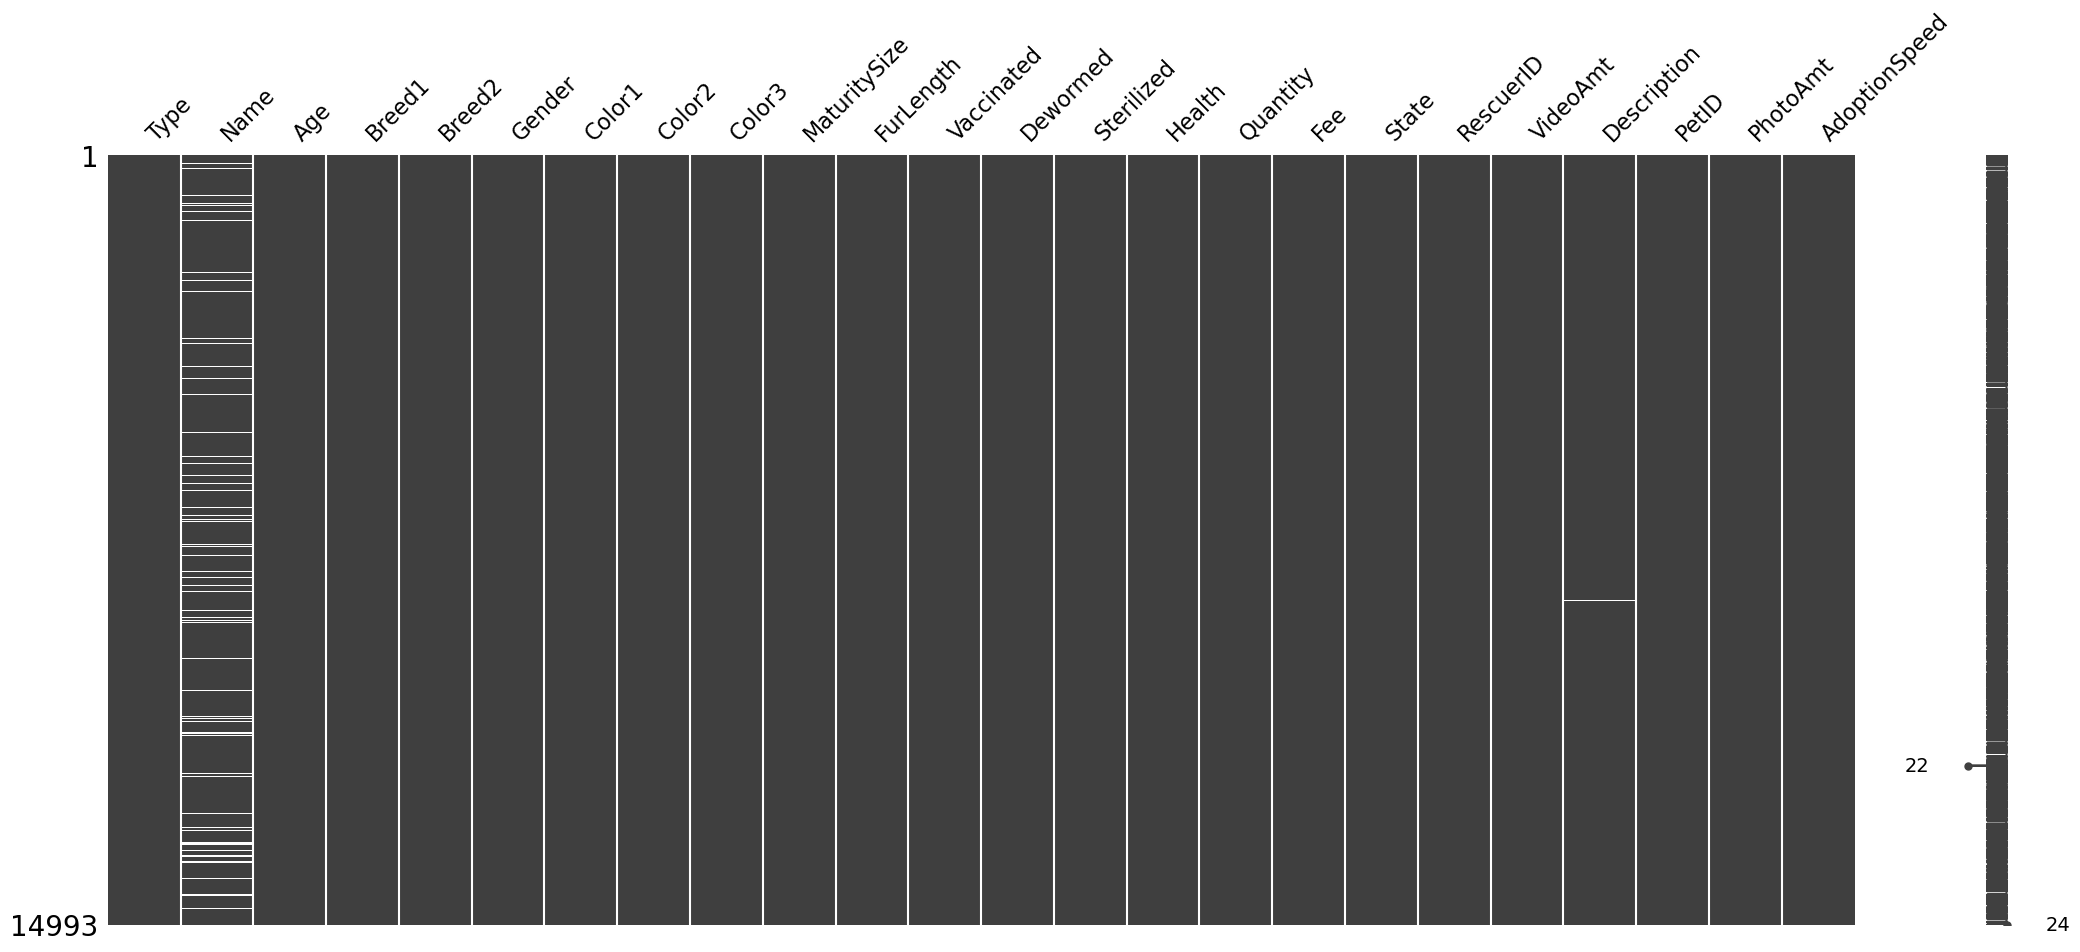

In [10]:
msno.matrix(train)

<Axes: >

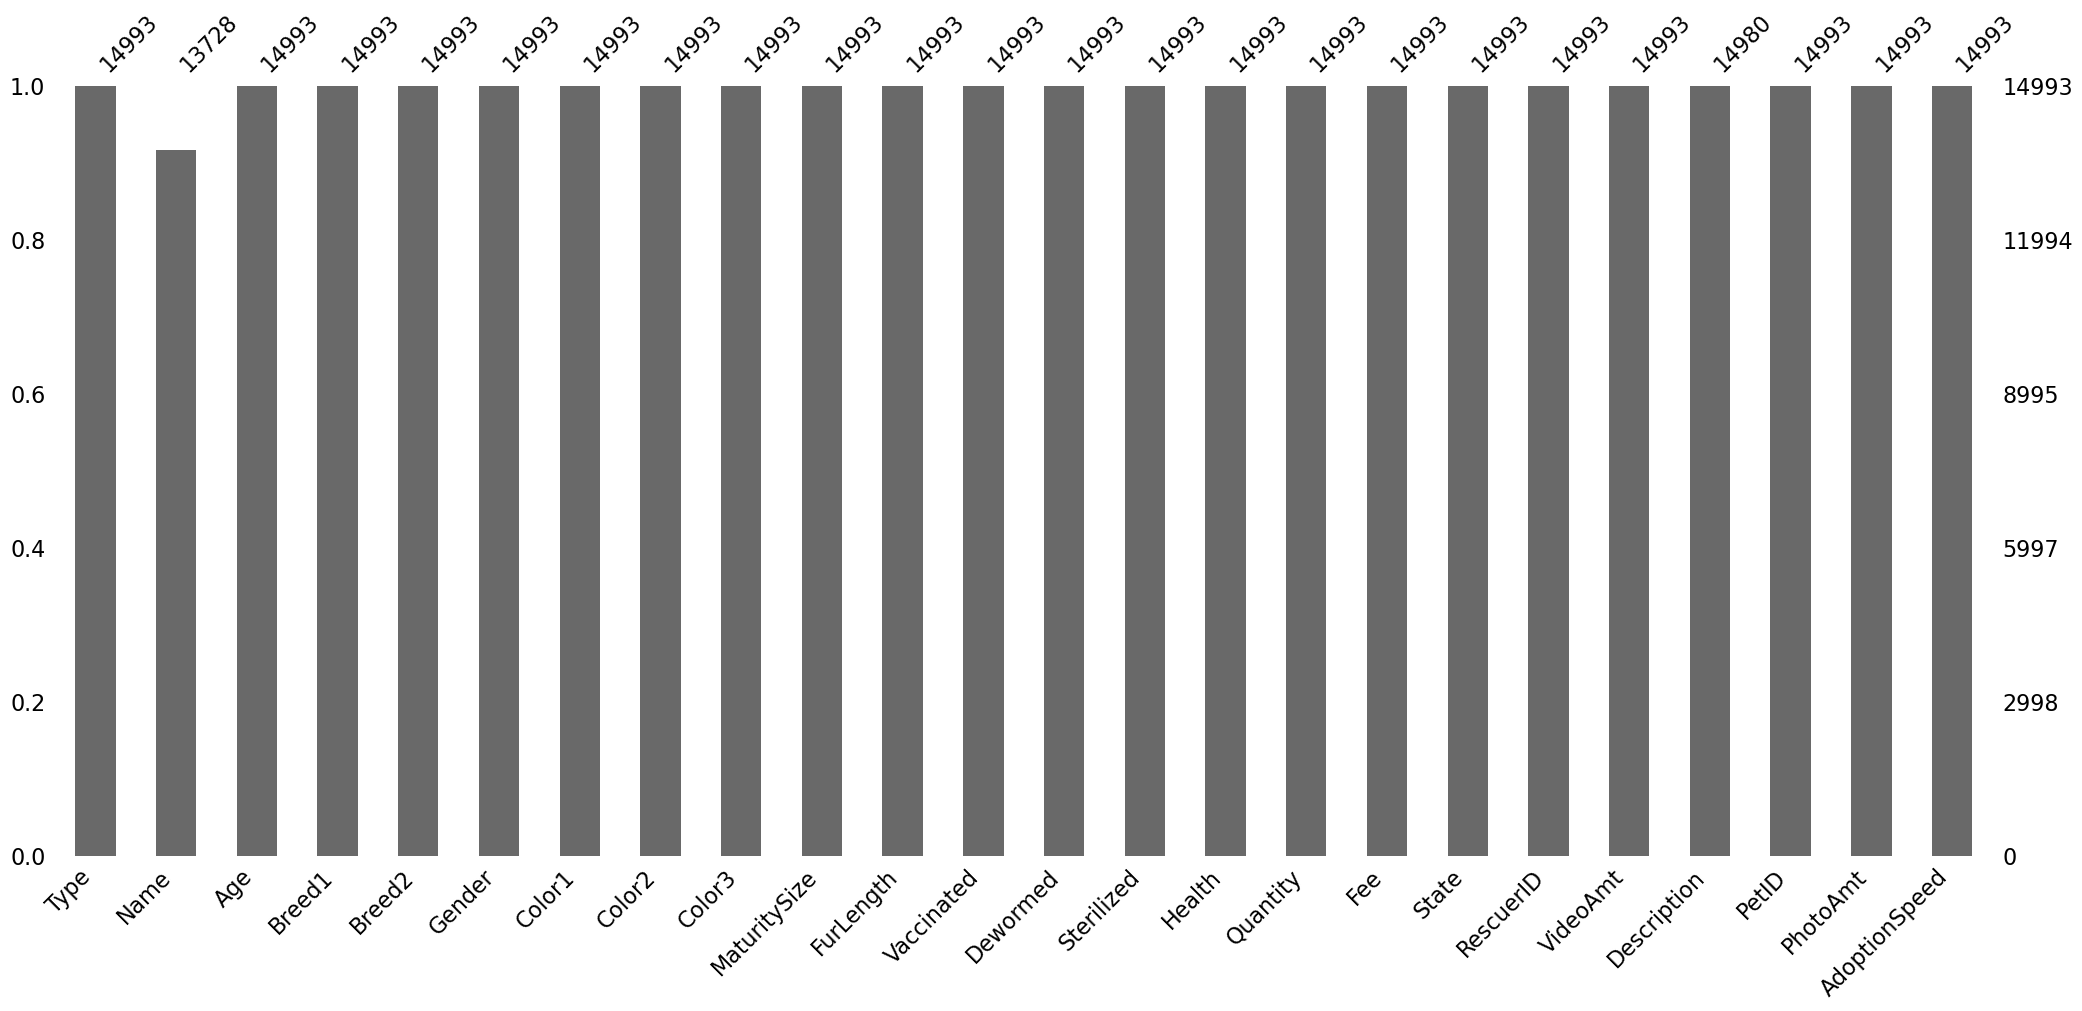

In [11]:
msno.bar(train)

#### 3.2.2 Inspeccion variable 'name'

In [12]:
#Verificamos los valores de la variable Name:
nombres_mascotas=train['Name'].value_counts().head(50)
print(nombres_mascotas)

#Filtramos los strings con valores similares a: "No" "no" "No Name" "No Name yet"

#Pasar a Python el script de SQL:
#SELECT Name FROM train WHERE Name LIKE 'No%' OR Name LIKE 'no%' OR Name LIKE 'No Name%' OR Name LIKE 'No Name yet%'
#ORDER BY Name

#Filtramos los strings con valores similares a: "No" "no" "No Name" "No Name yet"
train['Name'] = train['Name'].str.replace('No Name', 'NoName')

#¿separamos por gratos y perros?
#Vamos a realizar un Test t de hipotesis para validar estadisticamente si el nombre influye en la adopcion

#importamos librerias
import numpy as np
import scipy.stats as stats

#realizamos la prueba de hipotesis para decidir si los nombre de las mascotas influyen en la velocidad de adopcion de las mismas
#H0: Los nombres de las mascotas no influyen en la velocidad de adopcion
#H1: Los nombres de las mascotas influyen en la velocidad de adopcion

#creamos una tabla de contingencia
tabla_contingencia = pd.crosstab(train['Name'], train['AdoptionSpeed'])
tabla_contingencia

#realizamos la prueba de chi cuadrado
chi2, p, dof, ex = stats.chi2_contingency(tabla_contingencia)
print('Chi2: ', chi2)
print('P-value: ', p)
print('Grados de libertad: ', dof)
print('Valores esperados: ', ex)

#como el p-value es 0.317 y es mayor a 0.05, no rechazamos la hipotesis nula, por lo que los nombres de las mascotas no influyen en la velocidad de adopcion.

Name
Baby           66
Lucky          64
No Name        54
Brownie        54
Mimi           52
Blackie        49
Puppy          45
Kittens        39
Kitty          39
Max            39
Oreo           36
Coco           35
Tiger          34
Angel          33
Milo           32
Bobby          30
Snowy          30
Lucy           29
Kiki           29
Lily           28
Tom            27
Ginger         26
Puppies        26
Happy          25
Prince         25
Daisy          24
Bella          23
Simba          23
Rocky          23
Lola           23
Kitten         23
Luna           22
Momo           22
Molly          22
Princess       22
No Name Yet    22
Panda          21
Tommy          21
Buddy          21
Fluffy         21
Peanut         20
Cookie         20
Bobo           20
Snow           20
Toby           19
Mickey         18
Blacky         18
Shadow         18
Coffee         17
Teddy          17
Name: count, dtype: int64
Chi2:  36359.24399639169
P-value:  0.3175313038771268
Grados de liber

#Se encuentran con valores nulos las variables Name y Description. Name cuenta con 1265 nulos, a lo que debemos sumar las categorizados como "No Name". Debemos hacer posteriormente una limpieza e imputación de strings en la varibale Name. Continua en 4.1 Pre procesamiento.

In [13]:
import re

# Función para identificar nombres que indican que la mascota no tiene nombre
def is_no_name(name):
    # Definir un patrón que capture varias variantes de "No Name"
    pattern = re.compile(r'\b(no name|no name yet|unnamed|unknown name|not named|no named|unnamed yet|name not set)\b', re.IGNORECASE)
    return bool(pattern.search(name))

# Crear una columna indicando si el nombre es similar a "No Name"
train['is_no_name'] = train['Name'].apply(lambda x: is_no_name(str(x)))

# Filtrar los registros con "No Name"
no_name_df = train[train['is_no_name']]

# Mostrar los primeros registros para verificar
print(no_name_df.head())

# Mostrar la cantidad de registros con "No Name"
print(f"Cantidad de registros con 'No Name': {len(no_name_df)}")

# Eliminar la columna auxiliar 'is_no_name' para limpieza ver en 4.2
#train = train.drop(columns=['is_no_name'])


      Type                          Name  Age  Breed1  Breed2  Gender  Color1  \
557      2                       Unnamed   12     265       0       3       1   
2252     2                       Unnamed    1     266       0       3       1   
3295     2                       Unnamed    2     266       0       2       1   
3466     2  Unnamed 3 Kittens ( By Dani)    2     265       0       3       1   
3707     2                 Not Named Yet    1     266       0       2       5   

      Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  \
557        7       0             1          2           2         2   
2252       2       0             1          1           2         2   
3295       7       0             1          1           1         1   
3466       3       7             2          2           2         2   
3707       6       7             3          1           2         2   

      Sterilized  Health  Quantity  Fee  State  \
557            2       1         2  

#Observamos en la salida que registros con No Name o similar cuentan 112 registros.

#### 3.2.3 Inspeccion de variable 'velocidad de adopcion' y si contiene o no 'description'

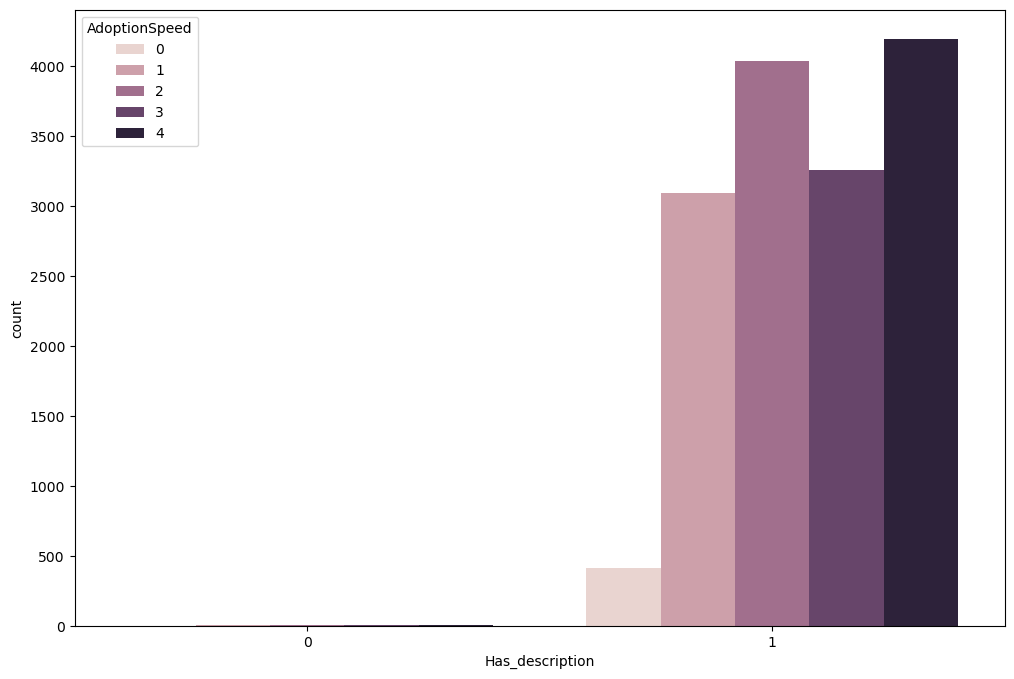

In [15]:
#Gráfico de velocidad de adopcion y si contiene o no descripción:
train['Description'] = train['Description'].fillna('Undescription')
train['Has_description'] = 1
train.loc[train['Description'] == 'Undescription', 'Has_description'] = 0

sns.countplot(x='Has_description', data=train, hue='AdoptionSpeed');

In [ ]:
#La relación entre ambos factores es considerable, por lo que repetimos el estudio sólo para el caso sin descripción

#### 3.2.4 Inspeccion de variable 'velocidad de adopcion' y ' no description'

<Axes: xlabel='Has_description', ylabel='count'>

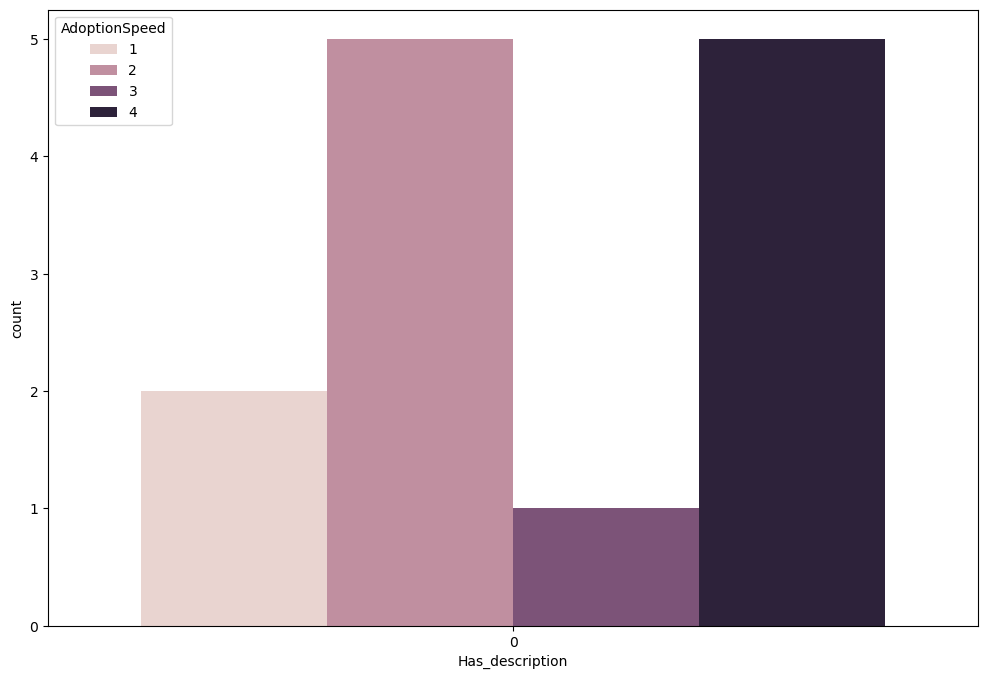

In [16]:
#Gráfico de velocidad de adopcion y no descripción:
#Almacenamos sólo los registros sin descripción
no_description_df = train[train['Has_description'] == 0]

sns.countplot(x='Has_description', data=no_description_df, hue='AdoptionSpeed')


#La variable Description no parece tener efecto claro en mejorar la velocidad de adopción.

#### 3.2.5 Separamos el dataset en dos, uno para perros y otro para gatos para analizar las razas de cada clase.

In [19]:
# Filtrar los datos de perros y gatos
dogs = train[train['Type'] == 1]
cats = train[train['Type'] == 2]
dogs.head()
cats.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,is_no_name,Has_name,Has_description
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,False,1,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,True,1,1
5,2,Unnamed,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,False,0,1
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,False,1,1
8,2,Unnamed,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,False,0,1


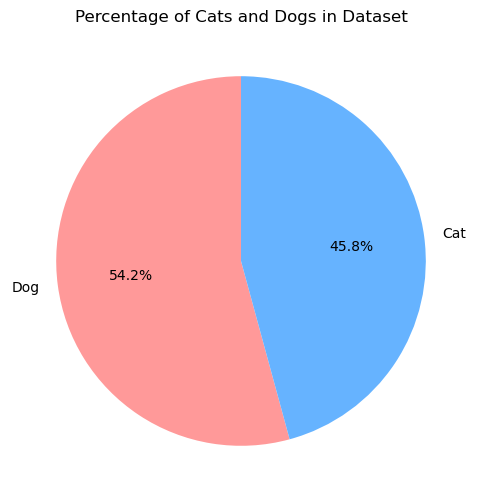

In [24]:
# Mapeo de los tipos de animales
type_mapping = {1: 'Dog', 2: 'Cat'}
train['Type'] = train['Type'].map(type_mapping)

# Contar el número de gatos y perros
type_counts = train['Type'].value_counts()
total_count = len(train)

# Calcular el porcentaje
type_percentages = (type_counts / total_count) * 100

# Graficar
plt.figure(figsize=(8, 6))
type_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Cats and Dogs in Dataset')
plt.ylabel('')  # Elimina la etiqueta del eje y
plt.show()

#### 3.2.6 Inspeccion de variable adopciones segun raza

In [23]:
# Contar adopciones por raza para perros
dog_breeds_adopted = dogs.groupby('Breed1')['AdoptionSpeed'].count().reset_index()
dog_breeds_adopted.columns = ['Breed1', 'AdoptionCount']
dog_breeds_adopted = dog_breeds_adopted.sort_values(by='AdoptionCount', ascending=False).head(10)
print(dog_breeds_adopted)

# Contar adopciones por raza para gatos
cat_breeds_adopted = cats.groupby('Breed1')['AdoptionSpeed'].count().reset_index()
cat_breeds_adopted.columns = ['Breed1', 'AdoptionCount']
cat_breeds_adopted = cat_breeds_adopted.sort_values(by='AdoptionCount', ascending=False).head(10)
print(cat_breeds_adopted)

     Breed1  AdoptionCount
115     307           5923
64      141            205
96      205            189
80      179            167
104     218            161
51      109            151
48      103             98
12       20             90
100     213             89
85      189             88
    Breed1  AdoptionCount
29     266           3634
28     265           1258
59     299            342
27     264            296
52     292            264
46     285            221
21     254            105
10     243             94
44     283             73
14     247             71


C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\994912139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Breed1', y='AdoptionCount', data=dog_breeds_adopted, palette='viridis')


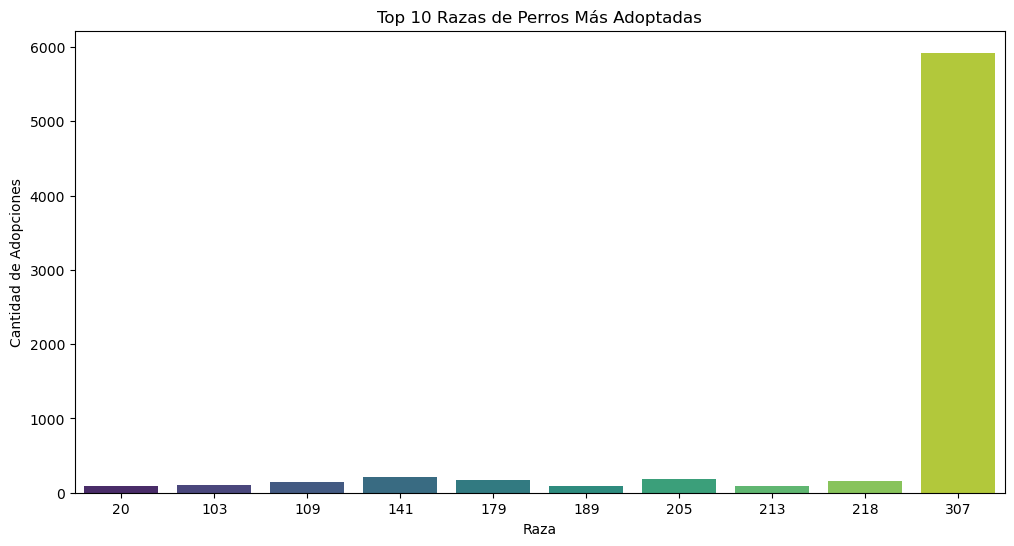

C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\994912139.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Breed1', y='AdoptionCount', data=cat_breeds_adopted, palette='magma')


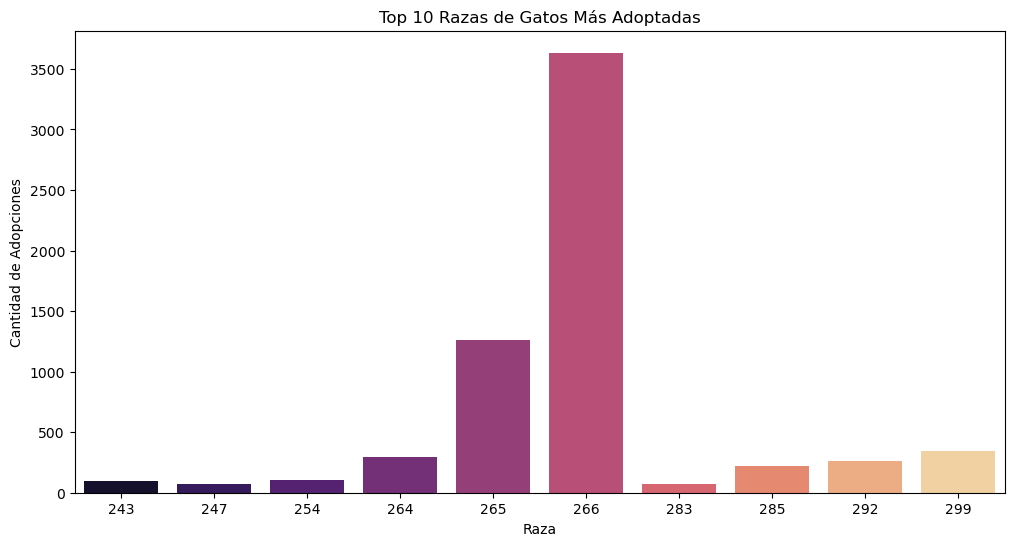

In [21]:

# Gráfico de las razas más adoptadas para perros según Breed1

plt.figure(figsize=(12, 6))

sns.barplot(x='Breed1', y='AdoptionCount', data=dog_breeds_adopted, palette='viridis')

plt.title('Top 10 Razas de Perros Más Adoptadas')

plt.xlabel('Raza')

plt.ylabel('Cantidad de Adopciones')

plt.show()
 
# Gráfico de las razas más adoptadas para gatos

plt.figure(figsize=(12, 6))

sns.barplot(x='Breed1', y='AdoptionCount', data=cat_breeds_adopted, palette='magma')

plt.title('Top 10 Razas de Gatos Más Adoptadas')

plt.xlabel('Raza')

plt.ylabel('Cantidad de Adopciones')

plt.show()


In [ ]:
#Perros:
#Encontramos el label 307 (Mestizo) como la raza mas popular en el dataset.

#Gatos:
#Encontramos el label 266 (Domestic Short Hair) como la raza mas popular en el dataset.

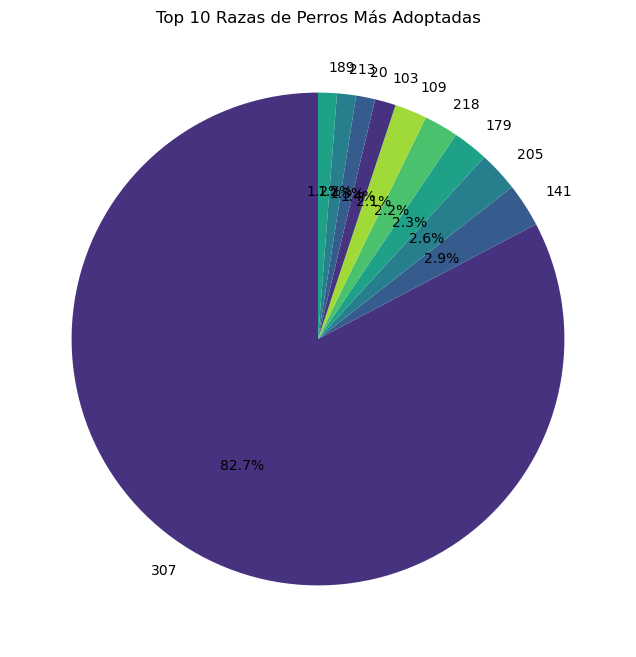

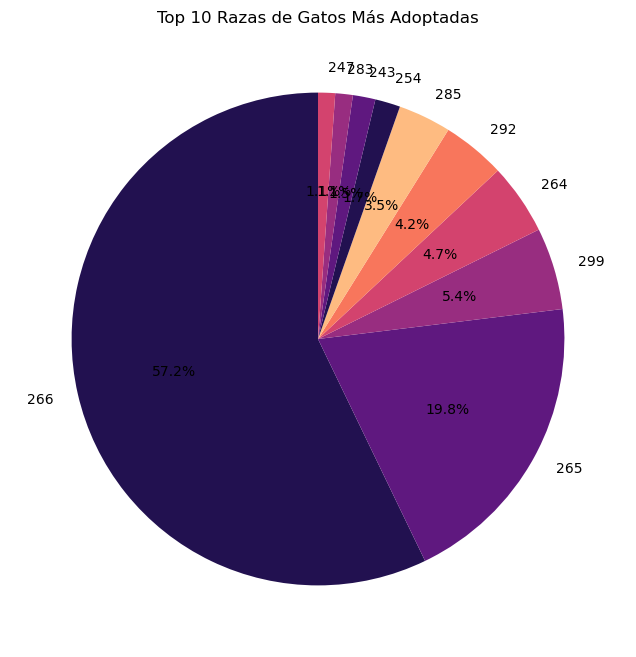

In [25]:
#Observmaos en un grafico de torta la distribución de las razas más populares en el dataset para perros y para gatos:

# Gráfico de torta de las razas más adoptadas para perros

plt.figure(figsize=(8, 8))

plt.pie(dog_breeds_adopted['AdoptionCount'], labels=dog_breeds_adopted['Breed1'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Top 10 Razas de Perros Más Adoptadas')

plt.show()

# Gráfico de torta de las razas más adoptadas para gatos

plt.figure(figsize=(8, 8))

plt.pie(cat_breeds_adopted['AdoptionCount'], labels=cat_breeds_adopted['Breed1'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma'))

plt.title('Top 10 Razas de Gatos Más Adoptadas')

plt.show()

#### 3.2.7 Inspeccion de variable color de las mascotas

In [26]:
#Analizamos los colores de las mascotas (Color 1, Color 2, Color 3)
# Contar la frecuencia de cada color en cada columna

color1_counts = train['Color1'].value_counts()

color2_counts = train['Color2'].value_counts()

color3_counts = train['Color3'].value_counts()
 
# Imprimir los resultados

print("Frecuencia de cada color en Color1:")

print(color1_counts)

print("\nFrecuencia de cada color en Color2:")

print(color2_counts)

print("\nFrecuencia de cada color en Color3:")

print(color3_counts)

# Crear una columna para la combinación de colores

train['ColorCombination'] = train[['Color1', 'Color2', 'Color3']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
 
# Contar las combinaciones de colores más comunes

color_combination_counts = train['ColorCombination'].value_counts().head(10)
 
# Imprimir los resultados

print("\nCombinaciones de colores más comunes:")

print(color_combination_counts)


Frecuencia de cada color en Color1:
Color1
1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: count, dtype: int64

Frecuencia de cada color en Color2:
Color2
0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: count, dtype: int64

Frecuencia de cada color en Color3:
Color3
0    10604
7     3221
5      417
6      378
4      198
3      175
Name: count, dtype: int64

Combinaciones de colores más comunes:
ColorCombination
2_0_0    1460
1_2_0    1417
1_7_0    1375
1_2_7    1159
1_0_0    1002
2_7_0     929
7_0_0     667
5_0_0     483
1_6_7     449
6_7_0     377
Name: count, dtype: int64


C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\2642032814.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color1_counts.index, y=color1_counts.values, palette='viridis')


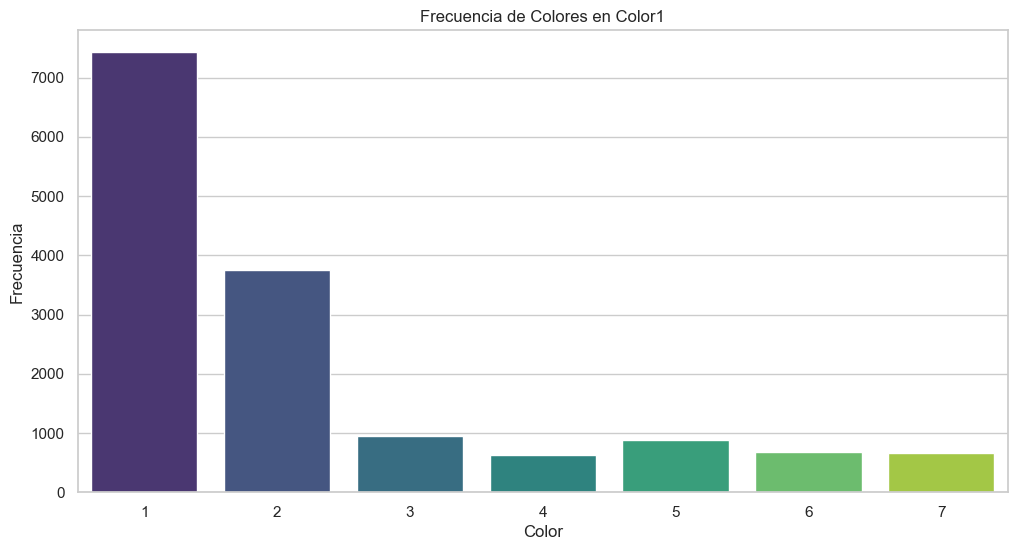

C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\2642032814.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color2_counts.index, y=color2_counts.values, palette='magma')


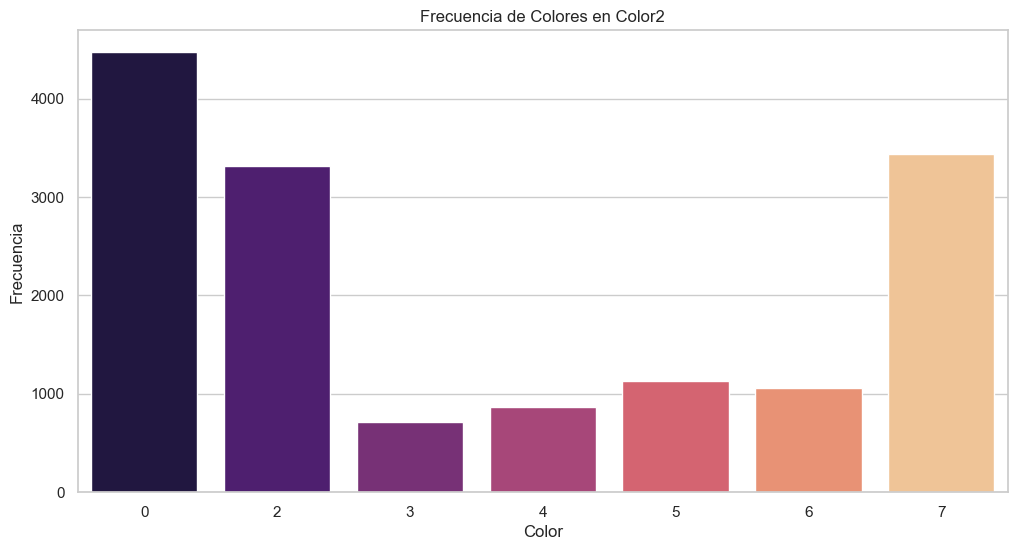

C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\2642032814.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color3_counts.index, y=color3_counts.values, palette='plasma')


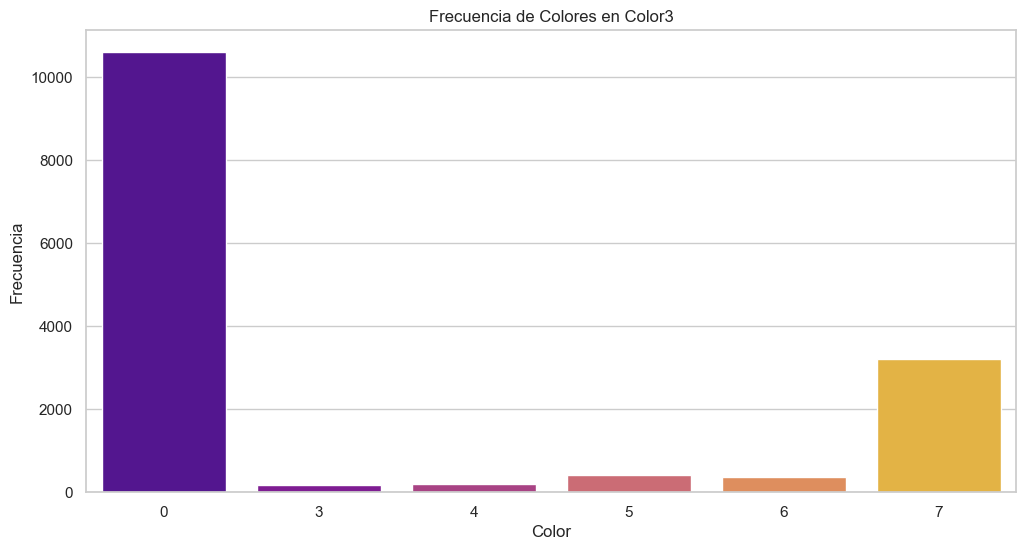

C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\2642032814.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_combination_counts.index, y=color_combination_counts.values, palette='cubehelix')


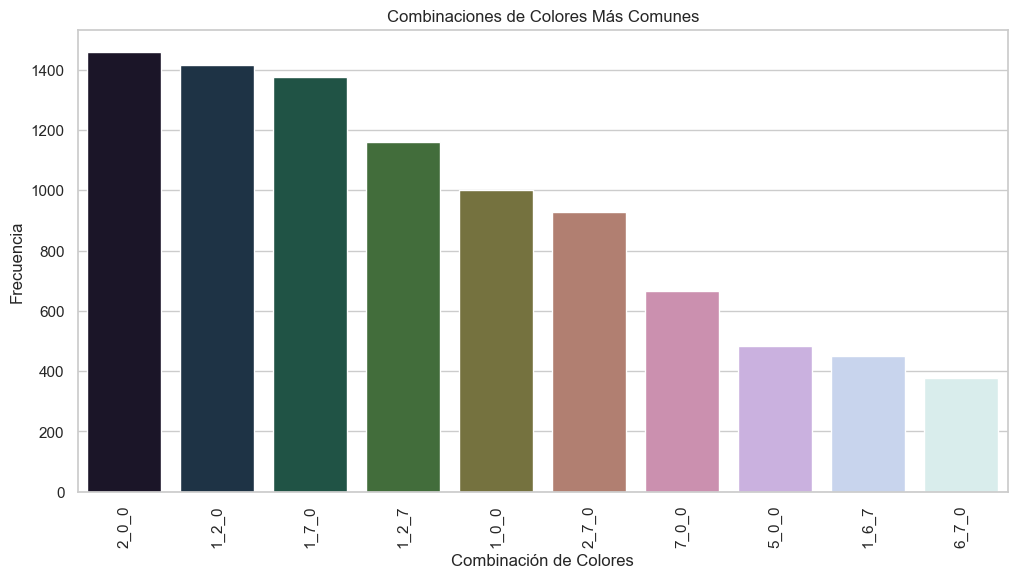

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Frecuencia de cada color en Color1
plt.figure(figsize=(12, 6))
sns.barplot(x=color1_counts.index, y=color1_counts.values, palette='viridis')
plt.title('Frecuencia de Colores en Color1')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()
 
# Frecuencia de cada color en Color2
plt.figure(figsize=(12, 6))
sns.barplot(x=color2_counts.index, y=color2_counts.values, palette='magma')
plt.title('Frecuencia de Colores en Color2')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()
 
# Frecuencia de cada color en Color3
plt.figure(figsize=(12, 6))
sns.barplot(x=color3_counts.index, y=color3_counts.values, palette='plasma')
plt.title('Frecuencia de Colores en Color3')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()
 
# Combinaciones de colores más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=color_combination_counts.index, y=color_combination_counts.values, palette='cubehelix')
plt.title('Combinaciones de Colores Más Comunes')
plt.xlabel('Combinación de Colores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#tiene menú contextual

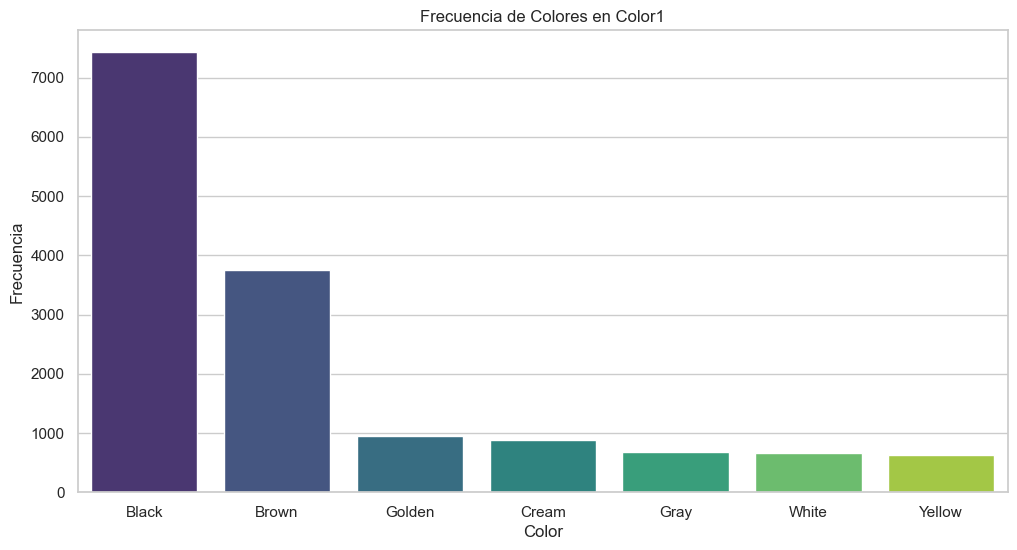

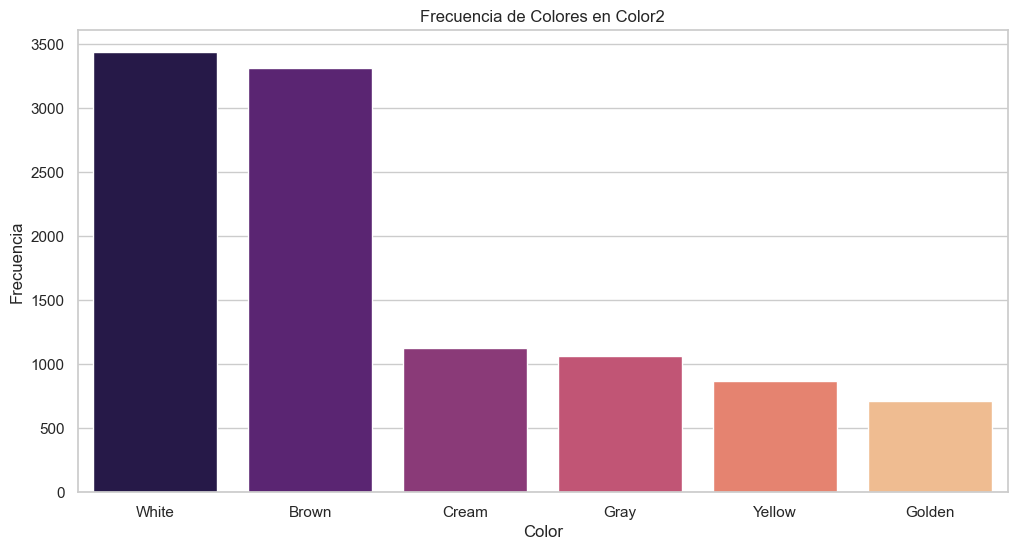

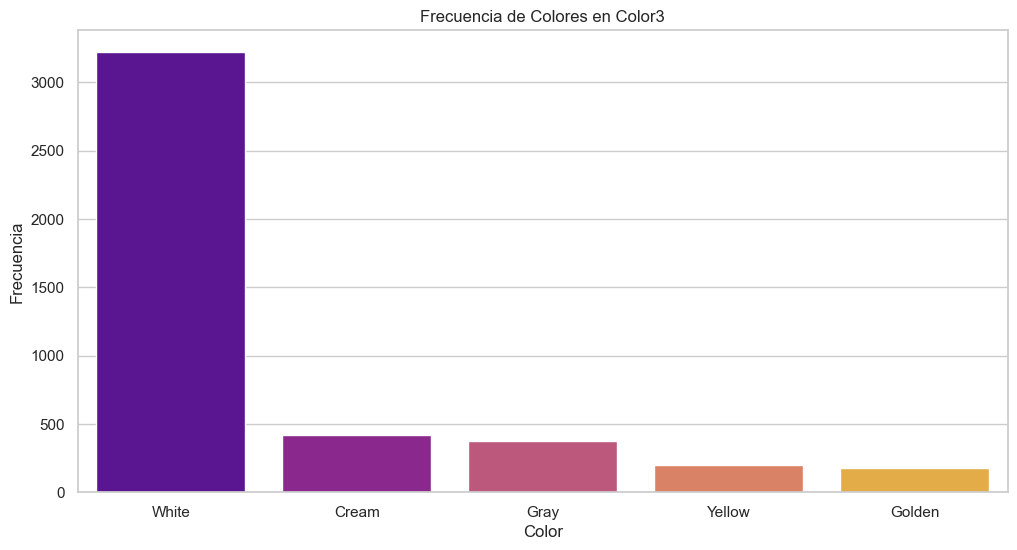

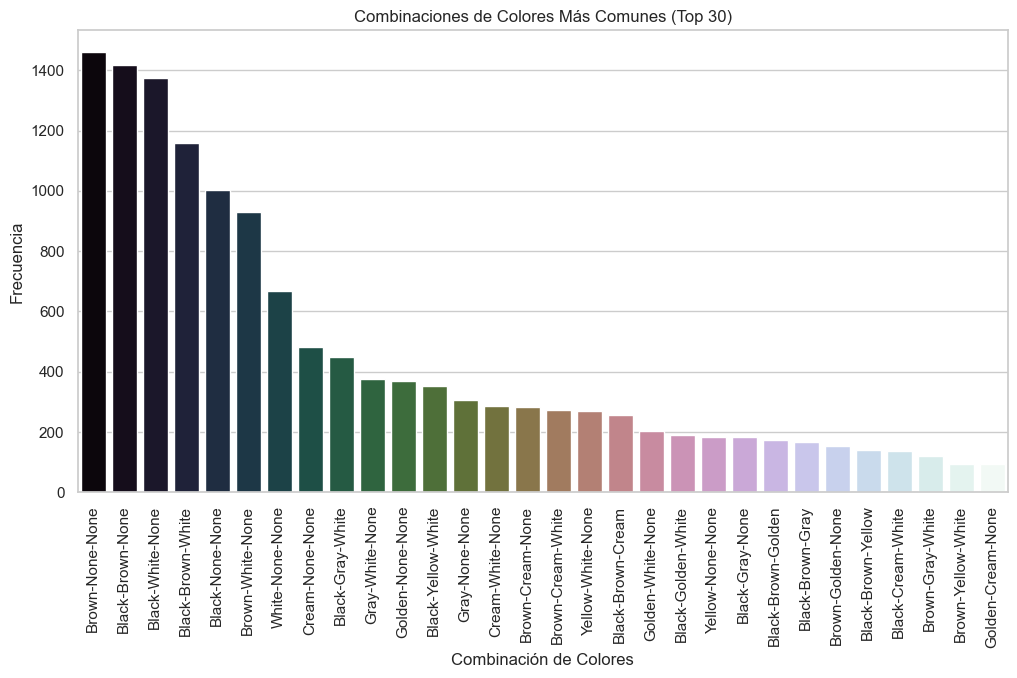

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de las visualizaciones
sns.set(style="whitegrid")

# Contar la frecuencia de cada valor en Color1 y hacer merge temporal para obtener los nombres de colores
color1_counts = train['Color1'].value_counts().reset_index()
color1_counts.columns = ['ColorID', 'Count']
color1_counts = color1_counts.merge(colors, how='left', left_on='ColorID', right_on='ColorID')

# Contar la frecuencia de cada valor en Color2 y hacer merge temporal para obtener los nombres de colores
color2_counts = train['Color2'].value_counts().reset_index()
color2_counts.columns = ['ColorID', 'Count']
color2_counts = color2_counts.merge(colors, how='left', left_on='ColorID', right_on='ColorID')

# Contar la frecuencia de cada valor en Color3 y hacer merge temporal para obtener los nombres de colores
color3_counts = train['Color3'].value_counts().reset_index()
color3_counts.columns = ['ColorID', 'Count']
color3_counts = color3_counts.merge(colors, how='left', left_on='ColorID', right_on='ColorID')

# Frecuencia de cada color en Color1
plt.figure(figsize=(12, 6))
sns.barplot(x='ColorName', y='Count', data=color1_counts, palette='viridis', hue='ColorName', dodge=False, legend=False)
plt.title('Frecuencia de Colores en Color1')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de cada color en Color2
plt.figure(figsize=(12, 6))
sns.barplot(x='ColorName', y='Count', data=color2_counts, palette='magma', hue='ColorName', dodge=False, legend=False)
plt.title('Frecuencia de Colores en Color2')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de cada color en Color3
plt.figure(figsize=(12, 6))
sns.barplot(x='ColorName', y='Count', data=color3_counts, palette='plasma', hue='ColorName', dodge=False, legend=False)
plt.title('Frecuencia de Colores en Color3')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()

# Combinaciones de colores más comunes
train = train.merge(colors[['ColorID', 'ColorName']], how='left', left_on='Color1', right_on='ColorID', suffixes=('', '_Color1'))
train = train.rename(columns={'ColorName': 'Color1_Name'})
train = train.drop(columns='ColorID')

train = train.merge(colors[['ColorID', 'ColorName']], how='left', left_on='Color2', right_on='ColorID', suffixes=('', '_Color2'))
train = train.rename(columns={'ColorName': 'Color2_Name'})
train = train.drop(columns='ColorID')

train = train.merge(colors[['ColorID', 'ColorName']], how='left', left_on='Color3', right_on='ColorID', suffixes=('', '_Color3'))
train = train.rename(columns={'ColorName': 'Color3_Name'})
train = train.drop(columns='ColorID')

# Asegurar que las columnas de nombres de colores estén correctamente alineadas y manejar valores faltantes
train['Color1_Name'] = train['Color1_Name'].fillna('None')
train['Color2_Name'] = train['Color2_Name'].fillna('None')
train['Color3_Name'] = train['Color3_Name'].fillna('None')

# Crear la columna de combinaciones de colores
train['Color_Combination'] = train['Color1_Name'] + '-' + train['Color2_Name'] + '-' + train['Color3_Name']

# Contar las combinaciones de colores
color_combination_counts = train['Color_Combination'].value_counts().reset_index()
color_combination_counts.columns = ['Color_Combination', 'Count']

# Limitar a las 30 combinaciones más comunes
top_30_combinations = color_combination_counts.head(30)

# Visualizar las combinaciones de colores más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x='Color_Combination', y='Count', data=top_30_combinations, palette='cubehelix', hue='Color_Combination', dodge=False, legend=False)
plt.title('Combinaciones de Colores Más Comunes (Top 30)')
plt.xlabel('Combinación de Colores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#En el grafico anterior aseignamos los valores al eje x
#pendiente

In [ ]:
#Se observa que la combinación de colores más popular del dataset (perros y gatos juntos), es la combinación de colores 2_0_0, que corresponde a color Brown (Marrón). 
#Se evaluará en 5.1 armar una nueva variable de colores puros.

#### 3.2.8 Inspeccion de variable Vacunacion y su velocidad de adopcion

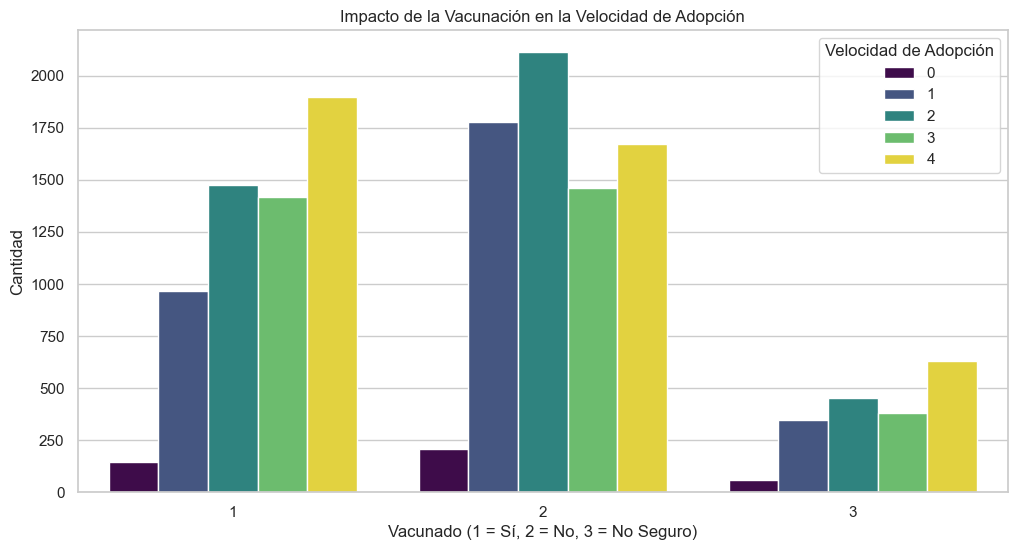

In [33]:
#Variables de salud: Vaccinated
#Factores 1=si, 2=no, 3=no se sabe

# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Vaccinated' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Vaccinated', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto de la Vacunación en la Velocidad de Adopción')
plt.xlabel('Vacunado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\4105340723.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vaccinated', data=adopted_in_0, palette='viridis')


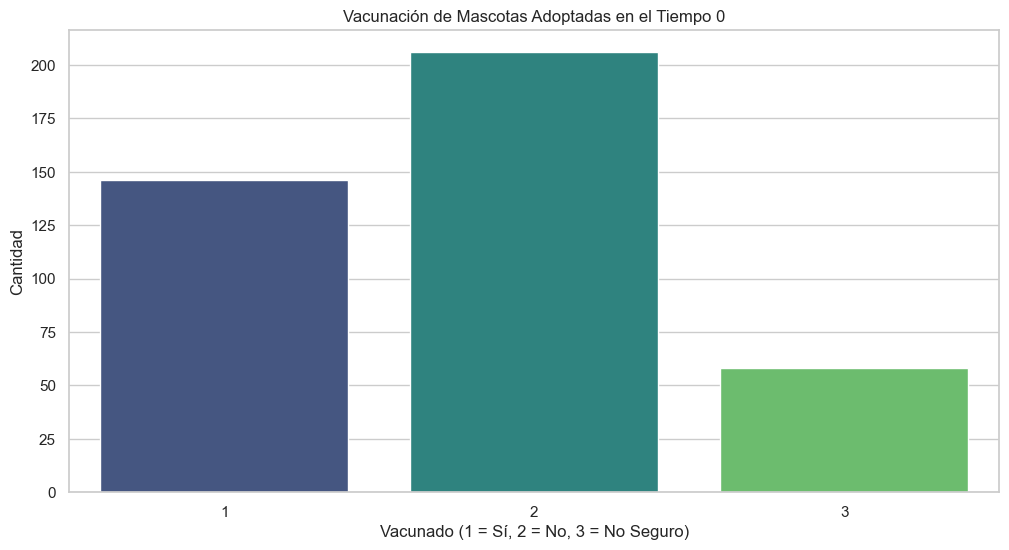

In [34]:
#Ahora verificamos la relación de mascotas adoptadas a tiempo 0 solamente y la variable Vaccinated:

# Filtrar los datos para obtener solo las mascotas adoptadas en el tiempo 0
adopted_in_0 = train[train['AdoptionSpeed'] == 0]

# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Vaccinated' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Vaccinated', data=adopted_in_0, palette='viridis')
plt.title('Vacunación de Mascotas Adoptadas en el Tiempo 0')
plt.xlabel('Vacunado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.show()



In [ ]:
#ahora l ovemos en cuadro de frecuencias relativas para comparar

# Calcular la frecuencia relativa de mascotas adoptadas en el tiempo 0 para cada valor de 'Vaccinated'  
vaccinated_counts = adopted_in_0['Vaccinated'].value_counts(normalize=True)

# Imprimir los resultados
print(vaccinated_counts)



Vaccinated
2    0.502439
1    0.356098
3    0.141463
Name: proportion, dtype: float64


In [ ]:
#A partir de los graficos de vacunación y velocidad de adopción, no parece observarse una relación clara entre la vacunación efectiva y la velocidad de adopción. 
#El caso de los cachorros puede estar influyendo en la presunción que mascotas vacunadas tengan preferencia de adopción o velocidad mayor, versus aquellas no vacunadas.

#### 3.2.9 Inspeccion de variable Desparacitacion y su velocidad de adopcion

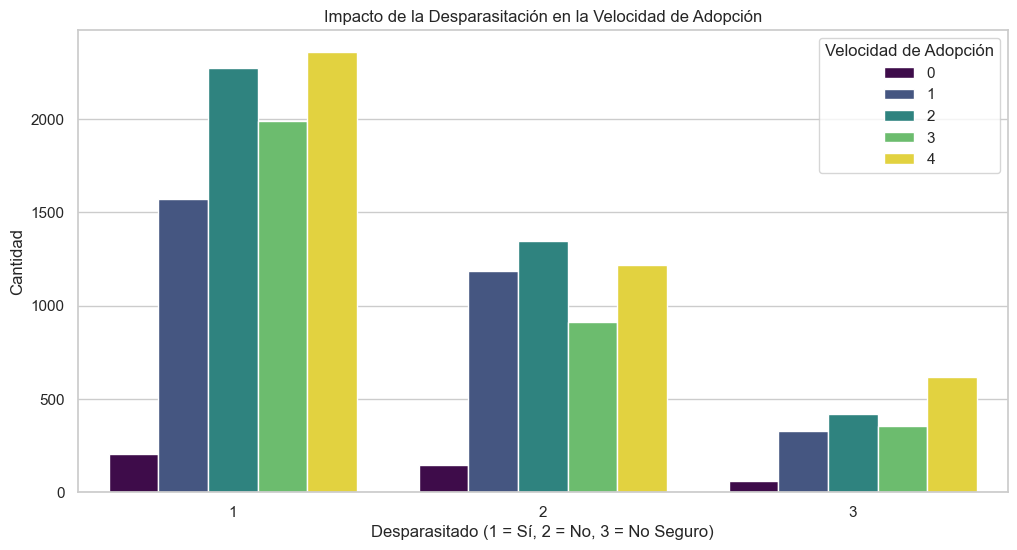

In [35]:
#Variables de salud: Dewormed
#Factores 1=si, 2=no, 3=no se sabe

# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Dewormed' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Dewormed', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto de la Desparasitación en la Velocidad de Adopción')
plt.xlabel('Desparasitado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()


In [ ]:
#A partir de los graficos de desparasitación y velocidad de adopción, no parece observarse una relación clara entre la desparasitación efectiva y la velocidad de adopción. 
#El caso de los cachorros puede estar influyendo en la presunción que mascotas vacunadas tengan preferencia de adopción o velocidad mayor, versus aquellas no desparasitadas

#### 3.2.10 Inspeccion de variable Esterilizacion y su velocidad de adopcion

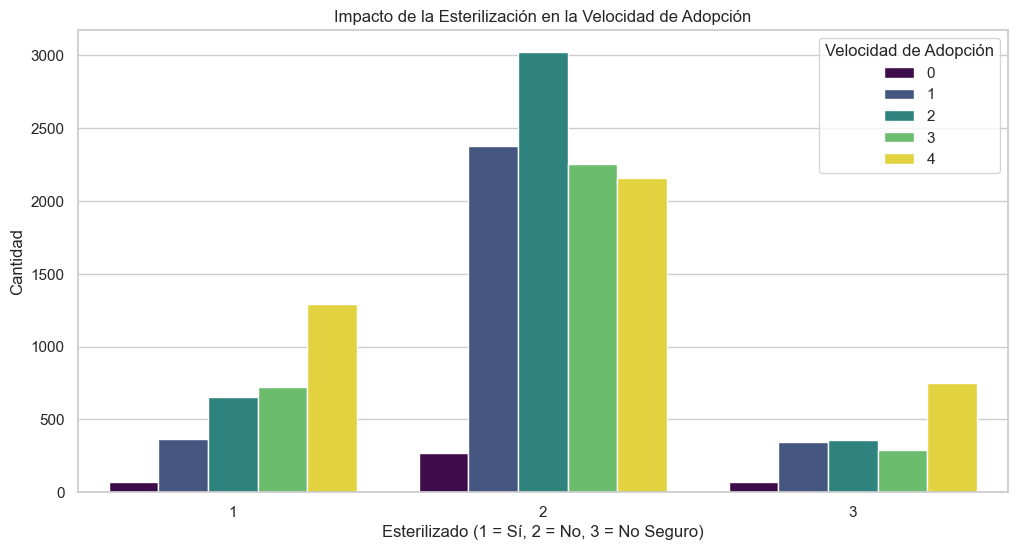

In [36]:
#Variables de salud: Sterilized
#Factores 1=si, 2=no, 3=no se sabe

# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Sterilized' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Sterilized', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto de la Esterilización en la Velocidad de Adopción')
plt.xlabel('Esterilizado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()

In [ ]:
#A partir de los graficos de esterilización y velocidad de adopción, no parece observarse una relación clara entre la esterilización efectiva y la velocidad de adopción. 
#El caso de los cachorros puede estar influyendo en la presunción que mascotas vacunadas tengan preferencia de adopción o velocidad mayor, versus aquellas no esterilizados.

#### 3.2.11 Inspeccion de variable Salud

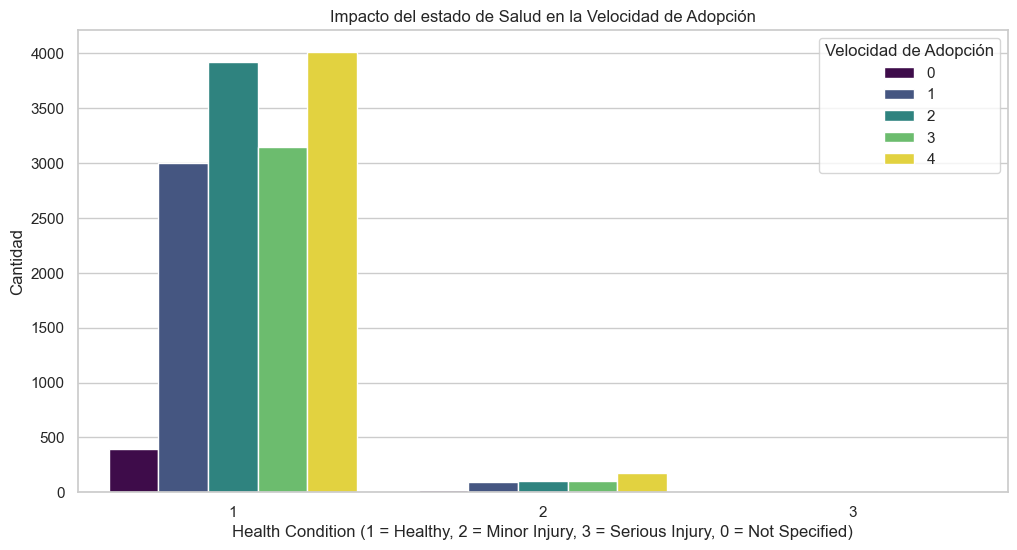

In [38]:
#Variables de salud: Health
#Factores Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Health' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Health', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto del estado de Salud en la Velocidad de Adopción')
plt.xlabel('Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()

In [ ]:
#La variable salud no parece tener un impacto significativo en la velocidad de adopción. 
#Es mas, el desbalance entre las tres categorías de salud es tal, que saludables sigue el mismo perfil de velocidades de adopción del dataset completo.

#### 3.2.12 Inspeccion de variable Fee y su velocidad de adopcion

C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\3992115989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AdoptionSpeed', y='Fee', data=train, palette='magma')


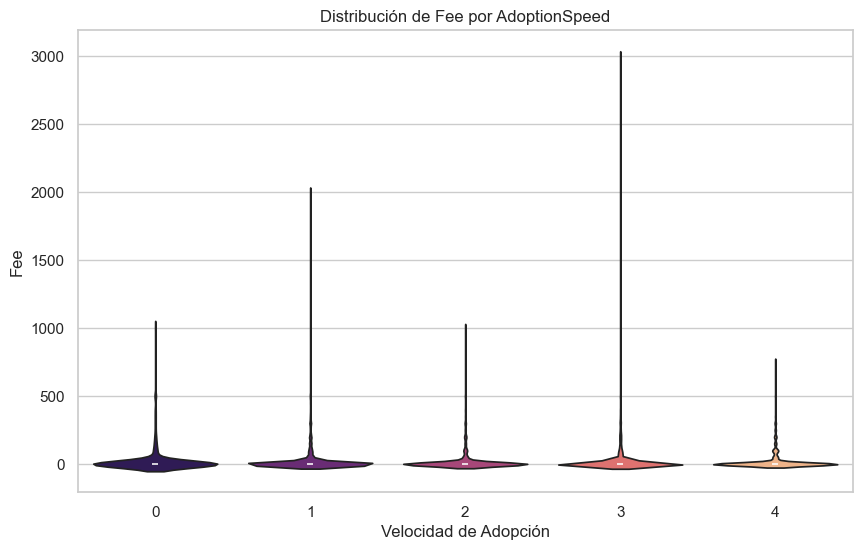

In [40]:
#Observamos el efecto de Fee en las adopciones
# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.violinplot(x='AdoptionSpeed', y='Fee', data=train, palette='magma')
plt.title('Distribución de Fee por AdoptionSpeed')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Fee')
plt.show()


#El grafíco de violines muestra gran asimetría y posible presenica de valores atípicos/outiers para todas las velocidades de adopción.

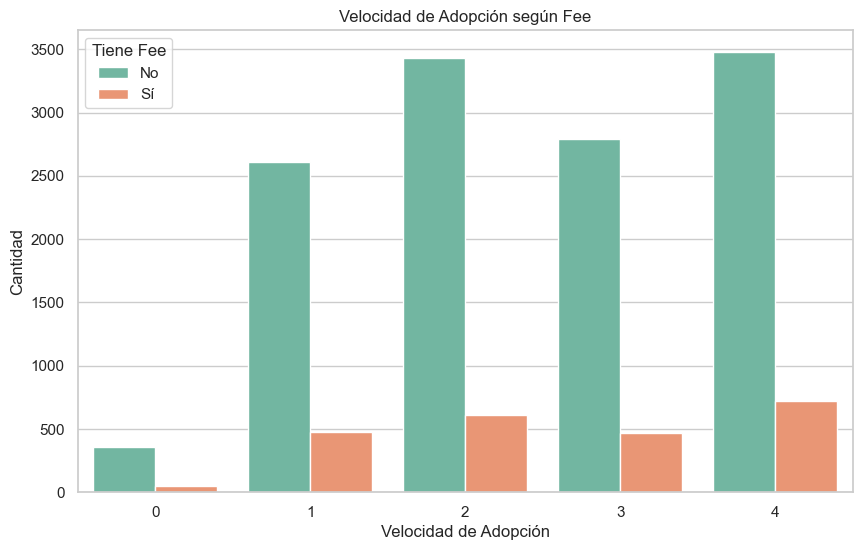

In [43]:
#Verificamos el comportamiento con y sin Fee
# Crear una columna 'Has_fee' para indicar si hay o no fee
train['Has_fee'] = train['Fee'] > 0
 
# Configurar las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Has_fee', palette='Set2')
plt.title('Velocidad de Adopción según Fee')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Tiene Fee', labels=['No', 'Sí'])
plt.show()


#La cantidad de adopciones con el factor "sin Fee" es mayoritaria para todas las velocidades de adopción.

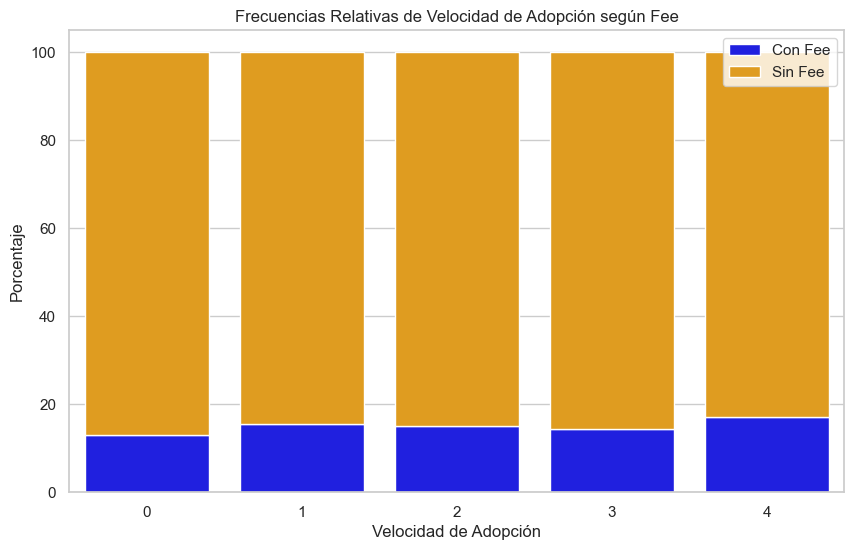

In [45]:
# Crear una columna 'Has_fee' para indicar si hay o no fee
train['Has_fee'] = train['Fee'] > 0
 
# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Has_fee'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[True], color='blue', label='Con Fee')
sns.barplot(x=freq_table.index, y=freq_table[False], color='orange', bottom=freq_table[True], label='Sin Fee')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Fee')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()



#salida: El índice de adopción relativo de las mascotas sin Fee es mayoritario, para cualquier velocidad de adopción. 
#Resulta más exitoso a los fines de adopción, que sea sin Fee y no se observan grandes diferencias relativas en cuanto a las distitnas velocidades de adopción (el porcentaje de adopciones sin Fee se mantiene aprox. constante).

#### 3.2.13 Inspeccion de variable regiones por estados 

C:\Users\HOME\AppData\Local\Temp\ipykernel_4080\593163955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=train, palette='viridis', order=train['State'].value_counts().index)


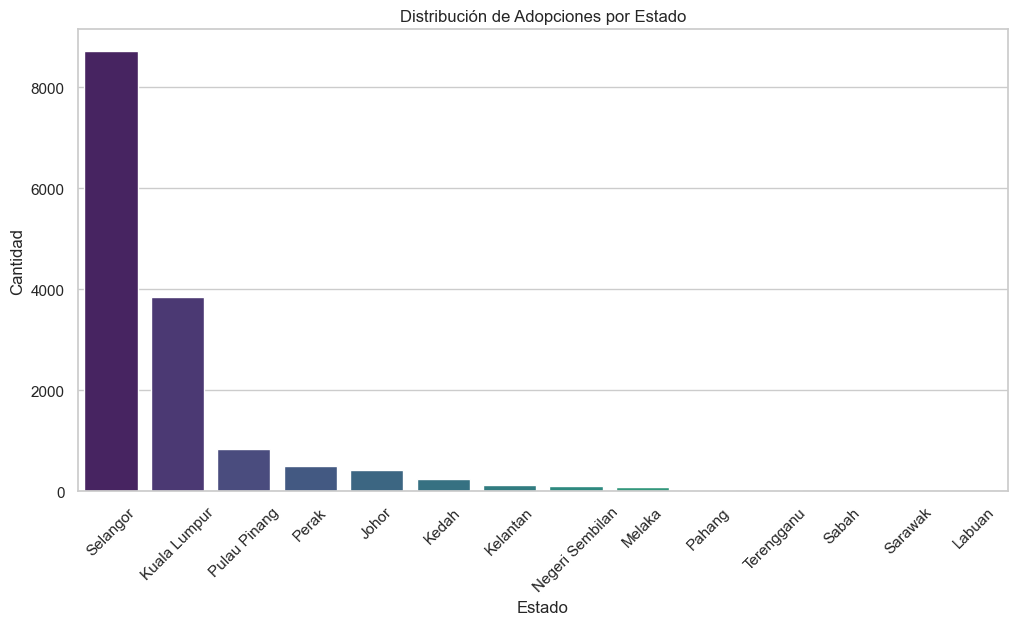

In [57]:
#Estudiamos las regiones geográficas:
#Graficamos la distribución de adopciones por región
#Indicamos los nombres de los Estados
#Ajustamos la etiqueta del eje x para visualizar los nombre de cada estado
#Ordenamos el grafico en eje x de forma descendente

# Configuración de las visualizaciones
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=train, palette='viridis', order=train['State'].value_counts().index)
plt.title('Distribución de Adopciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(14), labels=['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Perak', 'Johor', 'Kedah', 'Kelantan', 'Negeri Sembilan', 'Melaka', 'Pahang', 'Terengganu', 'Sabah', 'Sarawak', 'Labuan'], rotation=45)
plt.show()


#Se observa que en Selangor y en Kuala Lumpur, son las regiones con mayor canitdad absoluta de adopciones.


#### 3.2.14 Inspeccion de variable Fotos y su velocidad de adopcion

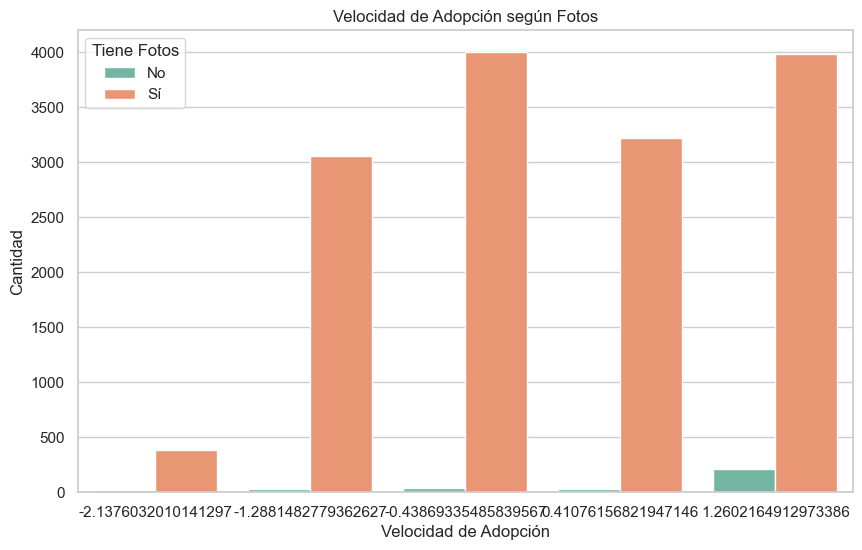

In [ ]:
#analizamos el impacto de tener fotos en la adopción:

# Crear una columna 'Has_photo' para indicar si hay o no fotos
train['Has_photo'] = train['PhotoAmt'] > 0

# Configurar las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Has_photo', palette='Set2')
plt.title('Velocidad de Adopción según Fotos')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Tiene Fotos', labels=['No', 'Sí'])
plt.show()

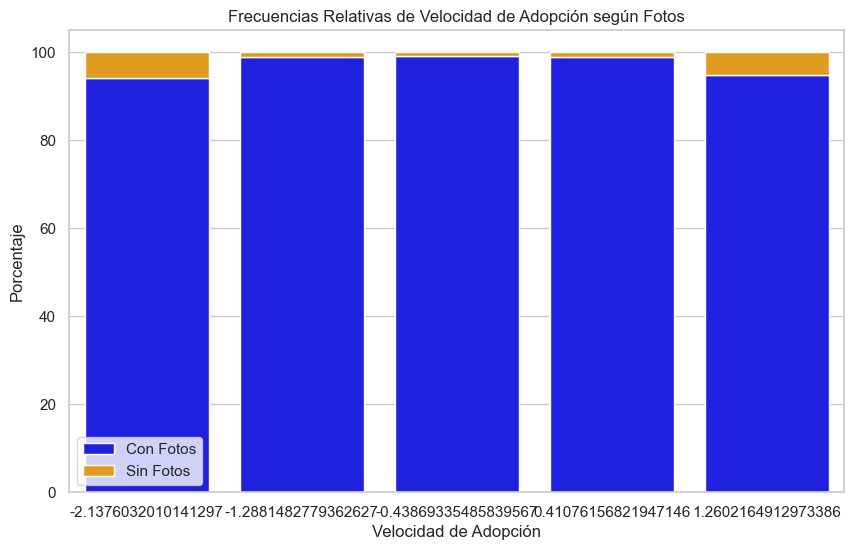

In [ ]:
#Realizamos un graifco de frecuencias relativas de adopciones y fotos:

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Has_photo'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[True], color='blue', label='Con Fotos')
sns.barplot(x=freq_table.index, y=freq_table[False], color='orange', bottom=freq_table[True], label='Sin Fotos')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Fotos')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()


#### 3.2.15 Inspeccion de variable Video y su velocidad de adopcion

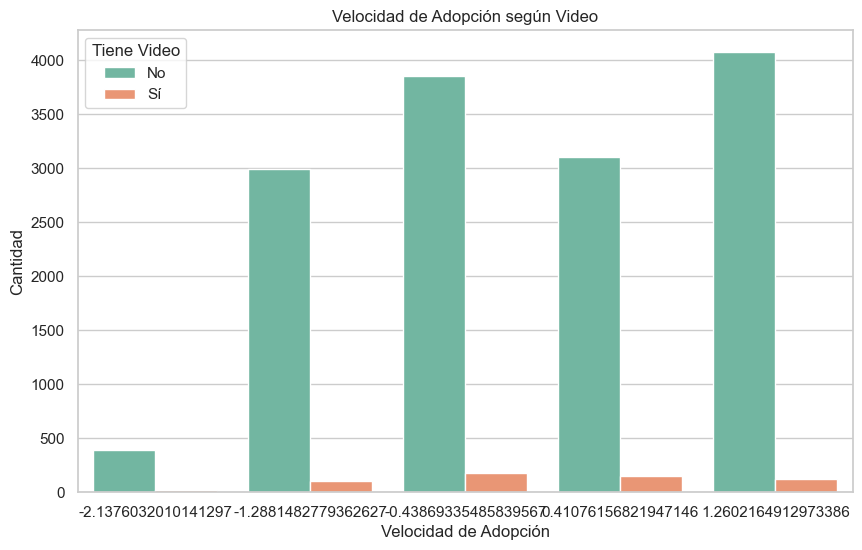

In [ ]:
#analizamos el impacto de tener video en la adopción:

# Crear una columna 'Has_video' para indicar si hay o no video
train['Has_video'] = train['VideoAmt'] > 0

# Configurar las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Has_video', palette='Set2')
plt.title('Velocidad de Adopción según Video')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Tiene Video', labels=['No', 'Sí'])
plt.show()


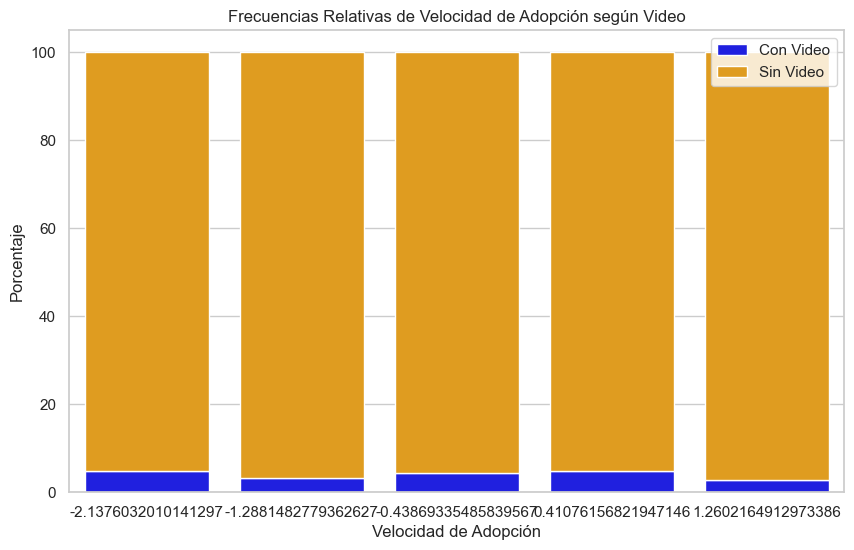

In [ ]:
#Realizamos un graifco de frecuencias relativas de adopciones y videos:

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Has_video'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[True], color='blue', label='Con Video')
sns.barplot(x=freq_table.index, y=freq_table[False], color='orange', bottom=freq_table[True], label='Sin Video')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Video')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()


In [ ]:
#Analizamos con un test estadístico si la velocidad de adopción es significativamente diferente para las mascotas con y sin video:	

# Importar la función 'ttest_ind' desde la librería 'scipy.stats'
import scipy.stats 
from scipy.stats import ttest_ind


# Filtrar los datos para comparar las velocidades de adopción de mascotas con y sin video
video = train[train['Has_video'] == True]['AdoptionSpeed']

no_video = train[train['Has_video'] == False]['AdoptionSpeed']

# Realizar el test de t de Student para comparar las medias
t_statistic, p_value = ttest_ind(video, no_video)

# Imprimir los resultados
print("Valor del estadístico t:", t_statistic)
print("Valor de p:", p_value)

#salida: El valor de p es mayor a 0.05, por lo que NO se rechaza la hipótesis nula de que las velocidades de adopción de mascotas con y sin video son iguales.
#Corolario: el video no afecta la velocidad de adopción con un test al 5% de significancia.

Valor del estadístico t: -1.4258273845295155
Valor de p: 0.15393899622029292


In [ ]:
#Analizamos la cantidad de observaciones que tienen video y su porcentaje:

# Calcular la cantidad de observaciones con video
video_count = train['Has_video'].sum()

# Calcular el porcentaje de observaciones con video
video_percentage = video_count / train.shape[0] * 100

print("Cantidad de Observaciones con Video:", video_count)

print("Porcentaje de Observaciones con Video:", video_percentage)


Cantidad de Observaciones con Video: 574
Porcentaje de Observaciones con Video: 3.828453278196492


In [ ]:
#Analizamos la cantidad de observaciones que tienen foto y su porcentaje:

# Calcular la cantidad de observaciones con foto
photo_count = train['Has_photo'].sum()

# Calcular el porcentaje de observaciones con foto
photo_percentage = photo_count / train.shape[0] * 100

print("Cantidad de Observaciones con Foto:", photo_count)

print("Porcentaje de Observaciones con Foto:", photo_percentage)

Cantidad de Observaciones con Foto: 14652
Porcentaje de Observaciones con Foto: 97.72560528246515


#### 3.2.16 Inspeccion de variable Quantity

/var/folders/l7/l93x40d92cvcv2gjmhtlx83m0000gn/T/ipykernel_73564/1943171823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quantity', data=train, palette='viridis')


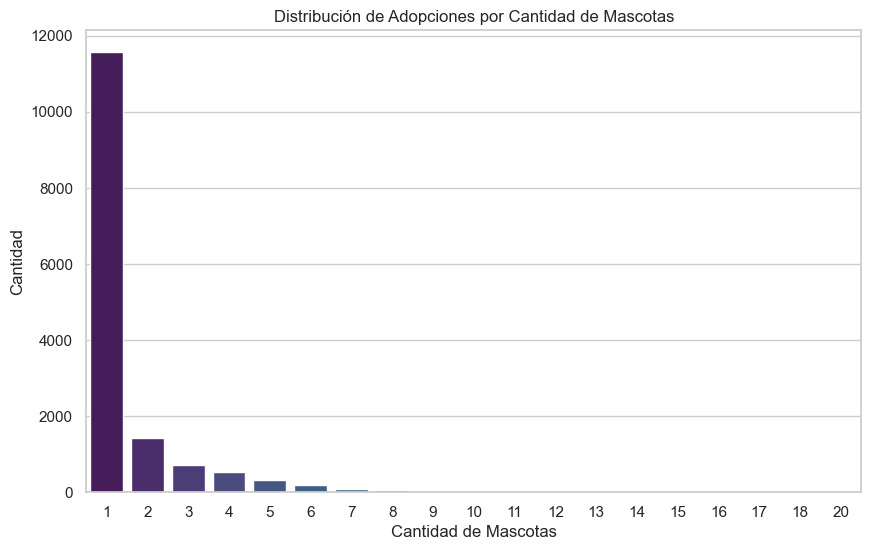

In [62]:
#Verificamos la cantidad de registros por cada categoria de la variable Quantity

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='Quantity', data=train, palette='viridis')
plt.title('Distribución de Adopciones por Cantidad de Mascotas')
plt.xlabel('Cantidad de Mascotas')
plt.ylabel('Cantidad')
plt.show()



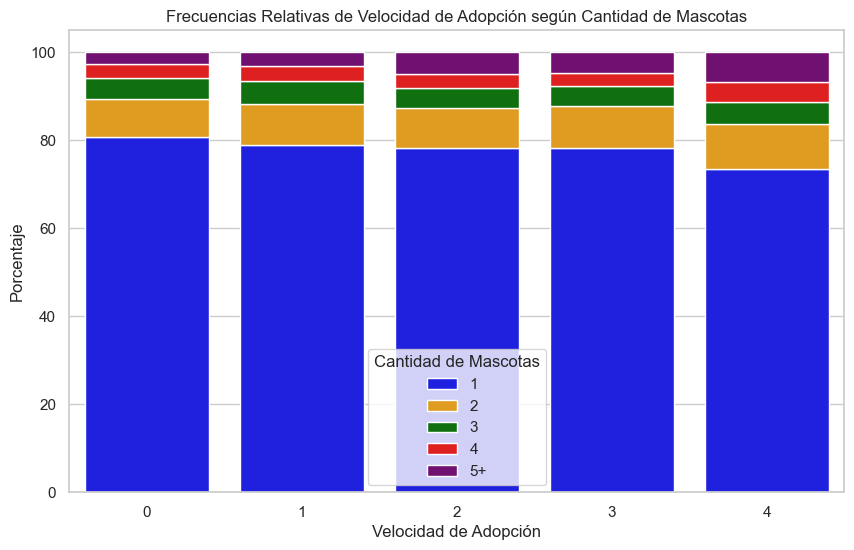

In [61]:
#Ahorai ndicar en porcentajes la cantidad de adopciones por cantidad de mascotas agrupando las mayores a 4 en un solo grupo

# Crear una columna 'Quantity_group' para agrupar las cantidades mayores a 4
train['Quantity_group'] = train['Quantity'].apply(lambda x: x if x <= 4 else '5+')

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Quantity_group'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[1], color='blue', label='1')
sns.barplot(x=freq_table.index, y=freq_table[2], color='orange', bottom=freq_table[1], label='2')
sns.barplot(x=freq_table.index, y=freq_table[3], color='green', bottom=freq_table[1] + freq_table[2], label='3')
sns.barplot(x=freq_table.index, y=freq_table[4], color='red', bottom=freq_table[1] + freq_table[2] + freq_table[3], label='4')
sns.barplot(x=freq_table.index, y=freq_table['5+'], color='purple', bottom=freq_table[1] + freq_table[2] + freq_table[3] + freq_table[4], label='5+')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Cantidad de Mascotas')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend(title='Cantidad de Mascotas')
plt.show()

                         

In [60]:
#Armamos una base sólo con los registros que correpsonden a velocidad de adopcion 0:

# Filtrar los datos para obtener solo las mascotas adoptadas en el tiempo 0
adopted_in_0 = train[train['AdoptionSpeed'] == 0]

#mostrar las primeras 5 filas
adopted_in_0.head()


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Color1_Name,Color2_Name,Color3_Name,Color_Combination
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Black,Brown,None,Black-Brown-None
75,1,Coco,2,307,0,2,2,5,0,2,1,2,1,2,1,1,0,41336,31de822d0adce3e2dad7dcedfbee2ba8,0,Hi Coco is a rescued puppy from the streets. I...,259b10a3e,1.0,0,Brown,Cream,None,Brown-Cream-None
106,2,SYLVESTER,1,266,266,3,1,7,0,2,1,1,1,2,1,2,1,41401,9b52af6d48a4521fd01d4028eb5879a3,0,"Kittens found living at restaurant, with sibli...",19b1f4263,3.0,0,Black,White,None,Black-White-None
170,2,Sunset,2,292,252,1,2,5,0,1,1,2,2,2,1,1,0,41401,2181fc2a61447996c1e5cee02738b5c3,0,*** Looking for someone who really love and ad...,b9590d4de,1.0,0,Brown,Cream,None,Brown-Cream-None
259,1,Chanelle,18,20,307,2,2,7,0,2,1,1,1,1,1,1,0,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,Chanelle found a home!,1c59cecac,10.0,0,Brown,White,None,Brown-White-None


#### 3.2.17 Inspeccion de variable Age y su velocidad de adopcion

/var/folders/l7/l93x40d92cvcv2gjmhtlx83m0000gn/T/ipykernel_73564/2097103507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 1, 6, 12, 24, 60, 120, 360], labels=['0-1', '1-5', '6-11', '12-23', '24-59', '60-119', '120+'])


KeyError: '120+'

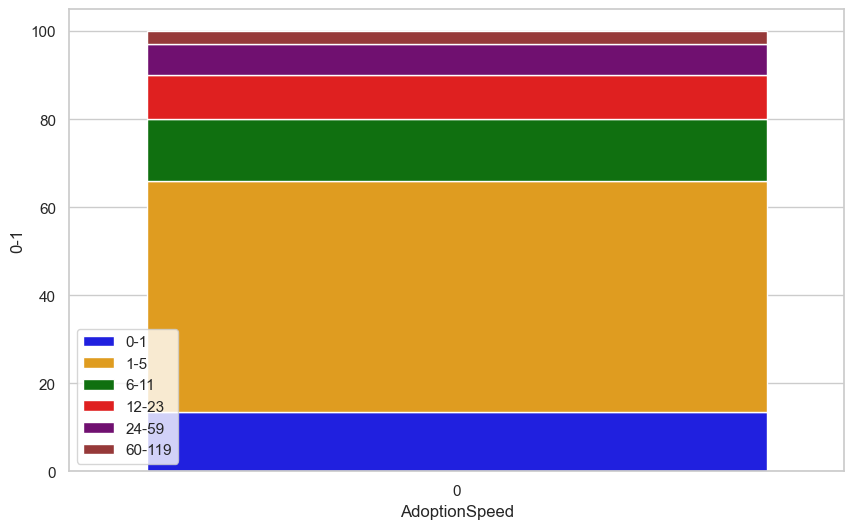

In [63]:
#verificamos los perfiles de adopción 0 y la variable Age (agrupando por rango de edades):

# Crear una columna 'Age_group' para agrupar las edades en rangos
adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 1, 6, 12, 24, 60, 120, 360], labels=['0-1', '1-5', '6-11', '12-23', '24-59', '60-119', '120+'])

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(adopted_in_0['AdoptionSpeed'], adopted_in_0['Age_group'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table['0-1'], color='blue', label='0-1')
sns.barplot(x=freq_table.index, y=freq_table['1-5'], color='orange', bottom=freq_table['0-1'], label='1-5')
sns.barplot(x=freq_table.index, y=freq_table['6-11'], color='green', bottom=freq_table['0-1'] + freq_table['1-5'], label='6-11')
sns.barplot(x=freq_table.index, y=freq_table['12-23'], color='red', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'], label='12-23')
sns.barplot(x=freq_table.index, y=freq_table['24-59'], color='purple', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'] + freq_table['12-23'], label='24-59')
sns.barplot(x=freq_table.index, y=freq_table['60-119'], color='brown', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'] + freq_table['12-23'] + freq_table['24-59'], label='60-119')
sns.barplot(x=freq_table.index, y=freq_table['120+'], color='pink', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'] + freq_table['12-23'] + freq_table['24-59'] + freq_table['60-119'], label='120+')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Edad')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend(title='Edad')
plt.show()



C:\Users\HOME\AppData\Local\Temp\ipykernel_1116\1778108096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionSpeed', y='Age', data=adopted_in_0, palette='viridis')


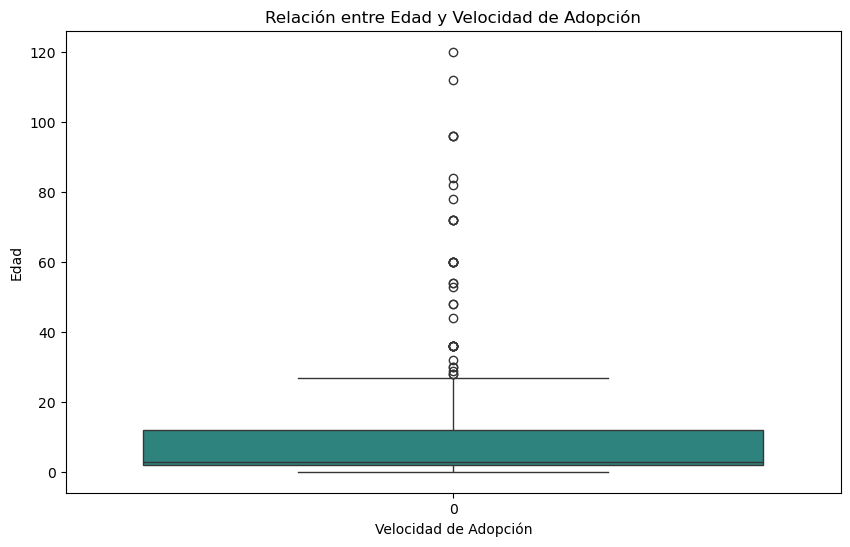

In [ ]:
#hacemos un boxplot de la variable Age para la velocidad de adopción 0:

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionSpeed', y='Age', data=adopted_in_0, palette='viridis')
plt.title('Relación entre Edad y Velocidad de Adopción')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Edad')
plt.show()


In [ ]:
#mostrar cuartiles de la variable Age para la velocidad de adopción 0:

# Calcular los cuartiles de la variable 'Age' para la velocidad de adopción 0
quartiles = adopted_in_0['Age'].quantile([0.25, 0.5, 0.75])

# Imprimir los resultados
print("Cuartil 25%:", quartiles[0.25])
print("Cuartil 50%:", quartiles[0.5])
print("Cuartil 75%:", quartiles[0.75])


Cuartil 25%: 2.0
Cuartil 50%: 3.0
Cuartil 75%: 12.0


In [ ]:
#Creamos una nueva variable de edad factorizada asignando puppie al rango 0-12 meses, adult al rango 13-84 meses y senior al rango 85+ meses:

# Crear una columna 'Age_group' factorizada
adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 12, 84, 360], labels=['Puppie', 'Adult', 'Senior'])

# Mostrar las primeras 5 filas
adopted_in_0.head()


C:\Users\HOME\AppData\Local\Temp\ipykernel_1116\2239862452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 12, 84, 360], labels=['Puppie', 'Adult', 'Senior'])


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Quantity_group,Age_group
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,Puppie
75,1,Coco,2,307,0,2,2,5,0,2,1,2,1,2,1,1,0,41336,31de822d0adce3e2dad7dcedfbee2ba8,0,Hi Coco is a rescued puppy from the streets. I...,259b10a3e,1.0,0,1,Puppie
106,2,SYLVESTER,1,266,266,3,1,7,0,2,1,1,1,2,1,2,1,41401,9b52af6d48a4521fd01d4028eb5879a3,0,"Kittens found living at restaurant, with sibli...",19b1f4263,3.0,0,2,Puppie
170,2,Sunset,2,292,252,1,2,5,0,1,1,2,2,2,1,1,0,41401,2181fc2a61447996c1e5cee02738b5c3,0,*** Looking for someone who really love and ad...,b9590d4de,1.0,0,1,Puppie
259,1,Chanelle,18,20,307,2,2,7,0,2,1,1,1,1,1,1,0,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,Chanelle found a home!,1c59cecac,10.0,0,1,Adult


In [ ]:
#verificamos cuantos registros de Sex=3 corresponden también a Quantity mayor a 1:

# Indicar los registros que contienen la combinación: Sex=3 y Quantity > 1:

#generamos una variable que indique Quantity > 1 =1, y Quantity=1 =0:

# Crear una columna 'Quantity_gt_1' para indicar si Quantity > 1
train['Quantity_gt_1'] = train['Quantity'].apply(lambda x: 1 if x > 1 else 0)

# Mostrar las primeras 5 filas

train.head()




,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Quantity_group,Quantity_gt_1
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,1,0
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1,0


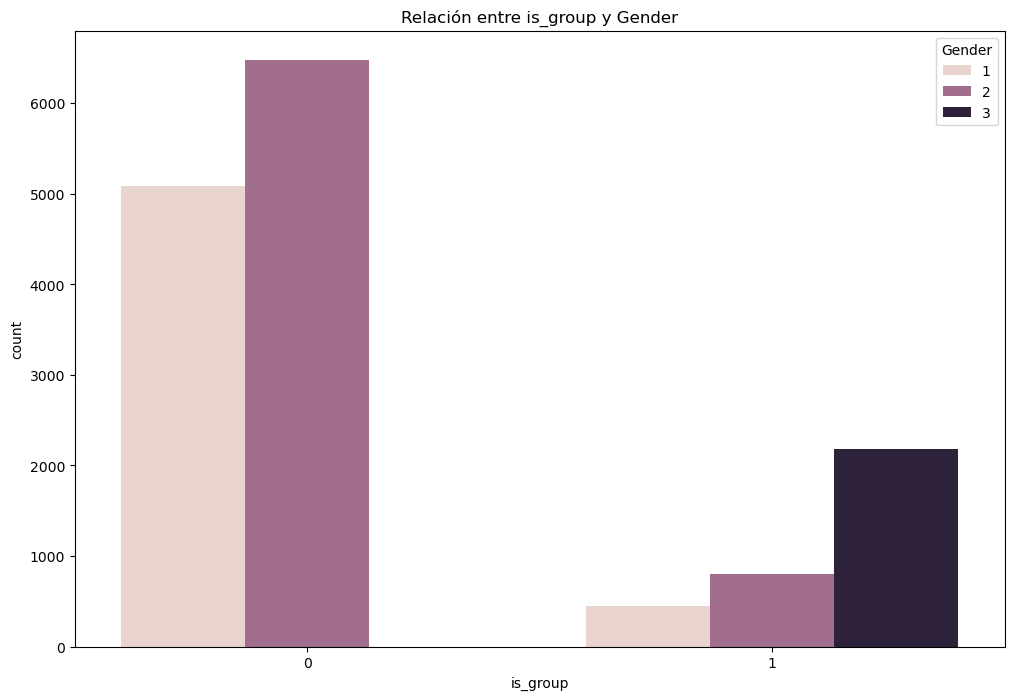

In [ ]:
# Crear la columna is_group según la condición dada
train['is_group'] = train['Quantity'].apply(lambda x: 1 if x > 1 else 0)

# Graficar la relación entre is_group y Gender
sns.countplot(x='is_group', hue='Gender', data=train)
plt.title('Relación entre is_group y Gender')
plt.show()

In [ ]:
#contamos la cantidad de registros de cada factor Quantity_gt_1 y su porcentaje:

# Calcular la cantidad de observaciones con Quantity > 1
quantity_gt_1_count = train['Quantity_gt_1'].sum()

# Calcular el porcentaje de observaciones con Quantity > 1
quantity_gt_1_percentage = quantity_gt_1_count / train.shape[0] * 100

print("Cantidad de Observaciones con Quantity > 1:", quantity_gt_1_count)

print("Porcentaje de Observaciones con Quantity > 1:", quantity_gt_1_percentage)

#Calcular el porcentaje de Quantity=1

# Calcular la cantidad de observaciones con Quantity = 1

quantity_1_count = train[train['Quantity'] == 1].shape[0]

# Calcular el porcentaje de observaciones con Quantity = 1
quantity_1_percentage = quantity_1_count / train.shape[0] * 100

print("Cantidad de Observaciones con Quantity = 1:", quantity_1_count)

print("Porcentaje de Observaciones con Quantity = 1:", quantity_1_percentage)

#verificamos la cantidad de registros de cada factor Quantity_gt_1 y su porcentaje:



Cantidad de Observaciones con Quantity > 1: 3428
Porcentaje de Observaciones con Quantity > 1: 22.86400320149403
Cantidad de Observaciones con Quantity = 1: 11565
Porcentaje de Observaciones con Quantity = 1: 77.13599679850597


In [ ]:
#Sumamos la cantidad de mascotas totales de la variable Quantity:
# Calcular la cantidad total de mascotas
total_pets = train['Quantity'].sum()
print("Cantidad Total de Mascotas:", total_pets)

Cantidad Total de Mascotas: 23630


In [ ]:
#cantidad de mascotas:

total_pets_registros = train['Quantity'].count()
print("Cantidad Total de registros", total_pets_registros)

Cantidad Total de registros 14993


In [ ]:
#restamos cantidad total de mascotas y registros:


# Calcular la diferencia entre la cantidad total de mascotas y la cantidad total de registros
difference = total_pets - total_pets_registros
print("Diferencia entre la Cantidad Total de Mascotas y la Cantidad Total de Registros:", difference)


Diferencia entre la Cantidad Total de Mascotas y la Cantidad Total de Registros: 8637


In [ ]:
#* Chequear Variables Categóricas y convertirlas en Numéricas
#Chequear variables categoricas de todo el dataset y convertirlas a numericas
train.dtypes # Chequeamos los tipos de datos
# al parecer estan ok

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [ ]:
#* Estandarizar o Normalizar

#no por el momento

In [ ]:
#Analizamos la cantidad de mascotas por raza (Breed1 y 2)

#recorremos el dataset y de cada registro almacenamos su breed1 y breed2 en un nuevo dataset
breed = pd.DataFrame()
breed['Breed'] = pd.concat([train['Breed1'], train['Breed2']]).value_counts().index
breed['Count'] = pd.concat([train['Breed1'], train['Breed2']]).value_counts().values
breed = breed.reset_index(drop=True)
breed

#salida: mayoritaria clase 0 (sumando Breed1 y Breed2) es la 307, seguida por la 307 y la 266. 

,Breed,Count
0,0,10767
1,307,7654
2,266,4233
3,265,1579
4,299,480
...,...,...
183,85,1
184,298,1
185,3,1
186,217,1


In [ ]:
#distinguimos las mascotas de raza pura
# Contar registros con valor distinto de 0 en Breed1 y valor igual a 0 en Breed2
breed1_nonzero_breed2_zero_count = train[(train['Breed1'] != 0) & (train['Breed2'] == 0)].shape[0]
 
# Contar registros donde Breed1 es igual a Breed2
breed1_equal_breed2_count = train[train['Breed1'] == train['Breed2']].shape[0]
 
# Imprimir resultados
print(f"Registros con Breed1 distinto de 0 y Breed2 igual a 0: {breed1_nonzero_breed2_zero_count}")
print(f"Registros con Breed1 igual a Breed2: {breed1_equal_breed2_count}")

Registros con Breed1 distinto de 0 y Breed2 igual a 0: 10762
Registros con Breed1 igual a Breed2: 1510


#### 3.2.18 Inspeccionamos la variable Gender

In [ ]:
#Analizamos el género de las mascotas:
# Contar los registros de la variable 'Gender'
conteo_genero = train['Gender'].value_counts()
print(conteo_genero)

#salida: Hay 

Gender
2    7277
1    5536
3    2180
Name: count, dtype: int64


### 3.3 PCA

                   PC1       PC2       PC3       PC4       PC5       PC6  \
Type          0.253435 -0.192342  0.216855  0.682711  0.076365  0.026840   
Age          -0.408382  0.225418 -0.419256  0.162111 -0.130892  0.081457   
Breed1        0.256734 -0.192097  0.567823 -0.295680  0.015495  0.010044   
Breed2       -0.005604 -0.056250 -0.406905 -0.052033  0.168420 -0.087260   
Gender        0.443587 -0.467668 -0.283094 -0.103661 -0.199215  0.362194   
Color1       -0.217067  0.318751  0.179562  0.185524  0.197733  0.647959   
Color2        0.144467 -0.202444  0.053518  0.514429  0.125478 -0.468255   
Color3        0.357442 -0.458006 -0.318269  0.175597 -0.155306 -0.210559   
MaturitySize -0.238961  0.051757 -0.221041 -0.386199  0.135753 -0.259579   
FurLength    -0.123149  0.175137 -0.479521  0.156868  0.158662  0.019968   
Vaccinated    0.728703  0.477361 -0.066413  0.021522  0.132380 -0.023544   
Dewormed      0.684423  0.503599 -0.143646 -0.030397  0.074379 -0.008965   
Sterilized  

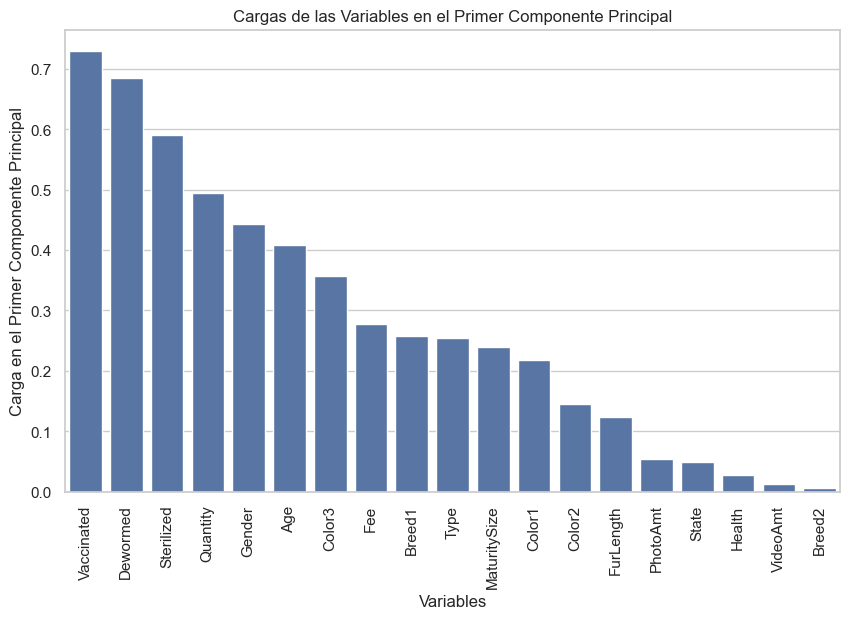


Variables más importantes en PC1:
                  PC1
Vaccinated  0.728703
Dewormed    0.684423
Sterilized  0.590137
Quantity    0.493929
Gender      0.443587
Age         0.408382
Color3      0.357442
Fee         0.277570
Breed1      0.256734
Type        0.253435

Variables más importantes en PC2:
                  PC2
Dewormed    0.503599
Vaccinated  0.477361
Gender      0.467668
Color3      0.458006
PhotoAmt    0.441269
Quantity    0.423959
Sterilized  0.397695
Color1      0.318751
Health      0.237463
Age         0.225418

Variables más importantes en PC3:
                    PC3
Breed1        0.567823
FurLength     0.479521
Age           0.419256
Breed2        0.406905
Fee           0.365029
Color3        0.318269
Quantity      0.298772
Gender        0.283094
MaturitySize  0.221041
Type          0.216855


In [55]:
#Peso de las variables para adopcion 0
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
adoption_speed_0 = train[train['AdoptionSpeed'] == 0]
# 1. Cargar el dataset
data = train

# 2. Preparar los datos
# Separar características y etiquetas (asumiendo que 'adoption_speed' es la variable objetivo)
X = data.drop('AdoptionSpeed', axis=1)
y = data['AdoptionSpeed']
 
# Asegurarse de que las variables sean numéricas
X = X.select_dtypes(include=[np.number])
 
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# 3. Aplicar PCA
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)
 
# 4. Examinar las cargas de los componentes principales
# Las cargas nos indican la correlación entre las variables originales y los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
 
# Crear un DataFrame para las cargas
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)
 
# Mostrar las cargas
print(loadings_df)
 
# 5. Identificar las variables más importantes para el primer componente principal
# Las variables con los valores absolutos más altos tienen mayor influencia
top_variables = loadings_df[['PC1']].abs().sort_values(by='PC1', ascending=False)
print(top_variables)
 
# Visualizar las cargas del primer componente principal
plt.figure(figsize=(10, 6))
sns.barplot(x=top_variables.index, y='PC1', data=top_variables)
plt.xticks(rotation=90)
plt.title('Cargas de las Variables en el Primer Componente Principal')
plt.xlabel('Variables')
plt.ylabel('Carga en el Primer Componente Principal')
plt.show()
 
# Mostrar las variables que representan las mayores variabilidades en los primeros componentes
for i in range(3):  # Cambiar el rango si se quieren más componentes
    top_variables = loadings_df[[f'PC{i+1}']].abs().sort_values(by=f'PC{i+1}', ascending=False)
    print(f'\nVariables más importantes en PC{i+1}:\n', top_variables.head(10))

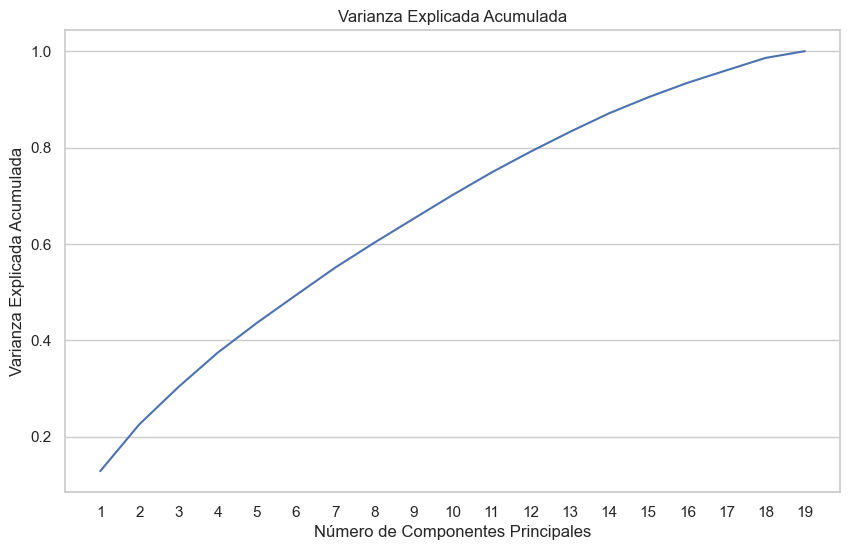

In [56]:
#graficamos el porcentaje de variabilidad de cada componente principal
# Visualizar la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_explained_variance) + 1), y=cumulative_explained_variance)
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(axis='x')
plt.show()

## 4. Pre Procesamiento de datos


In [9]:
#4.1 imputar nulos y No name-Marcos
#4.2 tratar caracteres especiales-Patri
#4.3 variables quantity (1 o mas de uno)-Fer/Hecho, no aporta diferencias claras.
#4.4 unificar idioma en descripción-Patri

### 4.1 Tratamiento de Nulos

In [10]:
#Abrimos el csv train2.csv del directorio actual en el cual hicimos las modificaciones
train2 = pd.read_csv("C:\\Users\\HOME\\Documents\\Maestría CDV\\11.Labo2\\repo\\LABO2_Group18\\input\\train2.csv")

train2.head()

#Agregar ruta al repositorio de github

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,NaN,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


In [ ]:
# Se realizo manualmente en el dataset la eliminacion de nombres debidoa que se encontraron demasiados erroneos como para realizar un scrip integrado. 
# Entre los errores se encuentran numeros, simbolos, fechas, variantes de no name etc. En Description se hizo la misma metodologia. 
# Originalmente el dataset en la variable 'name' contenia 1265 nulls y en description 13. 
# Luego del ajuste del dataset, los nulos en 'name' quedaron en 1453 y en 'description' 23.

### 4.2 Tratar Caracteres Especiales (HAY MAS CARATERES ESPECIALES COMO POR EJEMPLO %$#@!)

In [11]:
import re

def contiene_caracteres_especiales(cadena):
    # Define un patrón para caracteres especiales
    patron = re.compile(r'[^a-zA-Z0-9\s]')
    return bool(patron.search(cadena))


In [12]:
columnas_con_caracteres_especiales = []

for columna in train.columns:
    if train[columna].apply(lambda x: contiene_caracteres_especiales(str(x))).any():
        columnas_con_caracteres_especiales.append(columna)

print("Columnas con caracteres especiales:", columnas_con_caracteres_especiales)


Columnas con caracteres especiales: ['Name', 'Description', 'PhotoAmt']


In [13]:
columnas_con_caracteres_especiales = columnas_con_caracteres_especiales[:-1]

print(columnas_con_caracteres_especiales)

['Name', 'Description']


In [14]:
def eliminar_caracteres_especiales(cadena):
    return re.sub(r'[^a-zA-Z0-9\s]', '', cadena)

for columna in columnas_con_caracteres_especiales:
    train[columna] = train[columna].apply(lambda x: eliminar_caracteres_especiales(str(x)))


In [15]:
#Guardar dataset preproesado 
#train.to_csv('ruta/a/tu/dataset/train_preprocesado.csv', index=False)


### 4.3 Tratar variable Quantity

In [16]:
#Agrupamos la variable Quantity en dos categorías: 1 y 2+.

# Crear una columna 'Quantity_group' para agrupar las cantidades mayores a 1
train['Quantity_group'] = train['Quantity'].apply(lambda x: x if x <= 1 else '2+')  

# Mostrar las primeras 10 filas
train.head(10)


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Pure_color,Quantity_group
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3 month old ball of cuteness He is...,86e1089a3,1.0,2,False,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,False,1
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,False,1
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,Good guard dog very alert active obedience wai...,5842f1ff5,8.0,2,False,1
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption ...,850a43f90,3.0,2,True,1
5,2,nan,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house H...,d24c30b4b,2.0,2,False,1
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,True,1
7,1,Siu Pak Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13610 to 6puppies I...,97aa9eeac,9.0,3,False,2+
8,2,nan,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,healthy and active feisty kitten found in neig...,c06d167ca,6.0,1,False,1
9,2,Kitty,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,Very manja and gentle stray cat found we would...,7a0942d61,2.0,4,False,1


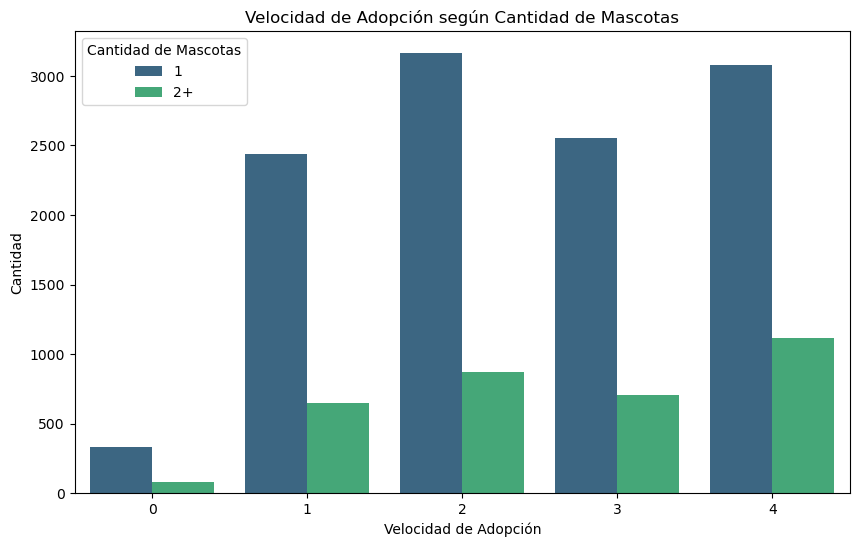

In [17]:
#Ahora comparamos la velocidad de adopción vs los dos valores que toma la variable Quantity_group:

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Quantity_group', palette='viridis')
plt.title('Velocidad de Adopción según Cantidad de Mascotas')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Cantidad de Mascotas')
plt.show()


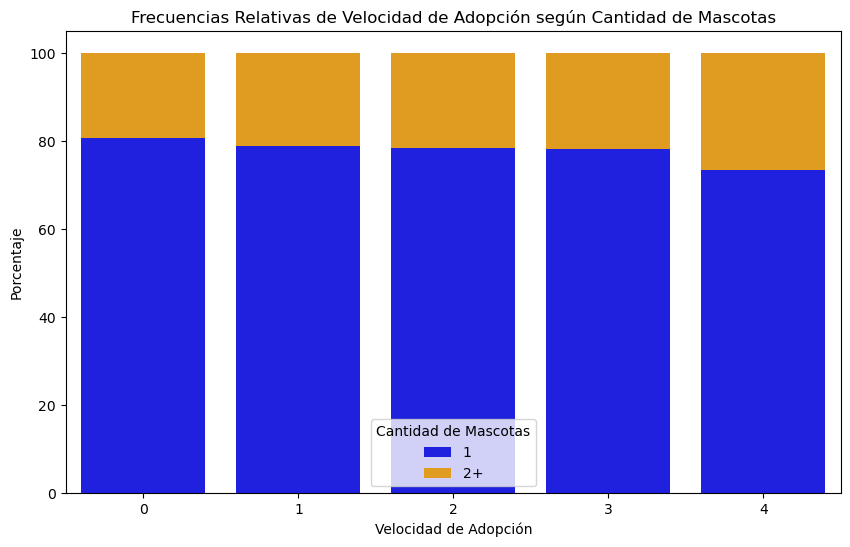

C:\Users\HOME\AppData\Local\Temp\ipykernel_3304\561251456.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AdoptionSpeed', data=train, palette='viridis')


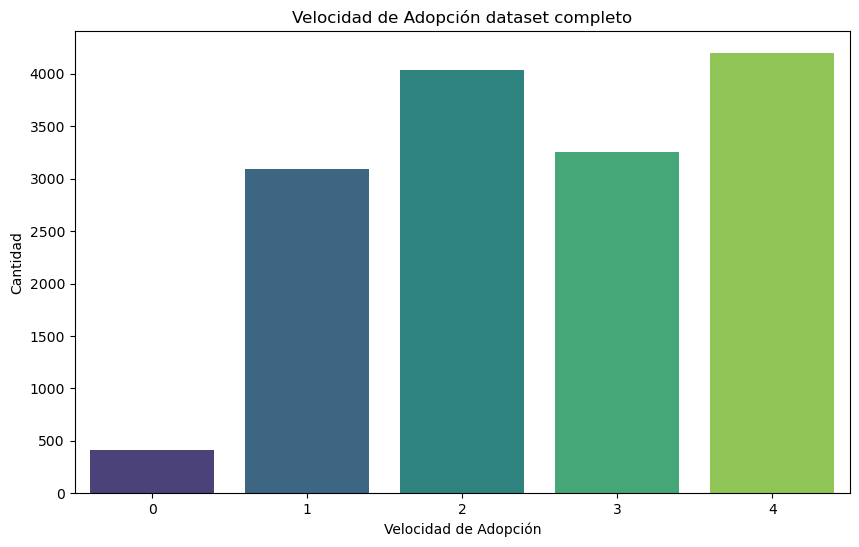

In [18]:
#Ahora creamos un indice de adopción grupal para la variable Quantity_group para cada velocidad de adopción:

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Quantity_group'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%:
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[1], color='blue', label='1')
sns.barplot(x=freq_table.index, y=freq_table['2+'], color='orange', bottom=freq_table[1], label='2+')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Cantidad de Mascotas')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend(title='Cantidad de Mascotas')
plt.show()

#Comparo con el grafico de velocidad de adopción del dataset original:

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, palette='viridis')
plt.title('Velocidad de Adopción dataset completo')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.show()




A partir de los gráficos no parece observarse una diferencia significativa en cuanto a la velocidad de adopción entre las mascotas grupales (2+) y las adoptadas individualmente (1).
El gráfico de barras apiladas muestra casi la misma proporción de adopciones por grupo/individual para las distintas velocidades de adopción. Y el perfil de adopciones individuales y grupales es msimilar (primer gráfico).

### 4.4 Unificar idioma en la variable Description (inglés)

In [19]:
pip install langdetect googletrans==4.0.0-rc1


In [65]:
from langdetect import detect
from googletrans import Translator

#Revisar porque me da error en mi compu

In [66]:
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return 'unknown'  # Manejar casos donde el idioma no se pueda detectar

train['language'] = train['Description'].apply(detectar_idioma)


In [67]:
translator = Translator()

def traducir_a_ingles(texto, idioma_origen):
    try:
        if idioma_origen != 'en':
            return translator.translate(texto, src=idioma_origen, dest='en').text
        return texto
    except:
        return texto  # Manejar errores de traducción

train['Description'] = train.apply(lambda row: traducir_a_ingles(row['Description'], row['language']), axis=1)


Se unifica el idioma para trabajar con las descripciones en inglés para luego agregar nuevas caracteristicas en FE. 

## 5. Feature Engeneering


In [ ]:
#5.1 crear variable colores puros-Fer/Hecho, desblanceada 7 vs 93 %.
#5.1 sumar tratamiento de género y esterilización-Marcos
#5.3 crear variable de salud integral-Fer, caso 1 de salud integral aumenta con la vel de adopción, cruzar con edad por cachorros.
#5.4 crear variable razas puras-Patri
#5.5 variable edad: cachorro , joven, adulto, senior-Marcos
#anulado-sentimientos a partir de descripción-Patri

### 5.1 Creación de variable colores puros

In [6]:
#Cuento la cantidad de Color1==0:
train['Color1'].value_counts()
print(train['Color1'].value_counts())

#Suma total de registros de Color1:
train['Color1'].count()
print(train['Color1'].count())

#Cuento la cantidad de Color2==0:
train['Color2'].value_counts()
print(train['Color2'].value_counts())

#Suma total de registros de 2:
train['Color2'].count()
print(train['Color2'].count())

#Cuento la cantidad de Color3==0:
train['Color3'].value_counts()
print(train['Color3'].value_counts())

#Suma total de registros de Color3:
train['Color3'].count()
print(train['Color3'].count())

# Creamos una nueva variable 'Pure_color' que indica si el color de la mascota es puro o no:
train['Pure_color'] = (train['Color1'] == 1) & (train['Color2'] == 0) & (train['Color3'] == 0)

# Mostrar las primeras 5 filas
train.head()

#Contar cuantos registros hay de cada factor de la variable Pure_color y su porcentaje:
#Calcular la cantidad de observaciones con colores puros
pure_color_count = train['Pure_color'].sum()

#Calcular el porcentaje de observaciones con colores puros:
pure_color_percentage = pure_color_count / train.shape[0] * 100

print("Cantidad de Observaciones con Colores Puros:", pure_color_count)

print("Porcentaje de Observaciones con Colores Puros:", pure_color_percentage)


Color1
1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: count, dtype: int64
14993
Color2
0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: count, dtype: int64
14993
Color3
0    10604
7     3221
5      417
6      378
4      198
3      175
Name: count, dtype: int64
14993
Cantidad de Observaciones con Colores Puros: 1002
Porcentaje de Observaciones con Colores Puros: 6.683118788768091


Colores puros es una variable muy desbalanceada, con aprox. el 7% de los registros para color puro vs el 93% de registros para colores no puros -mezclas-.

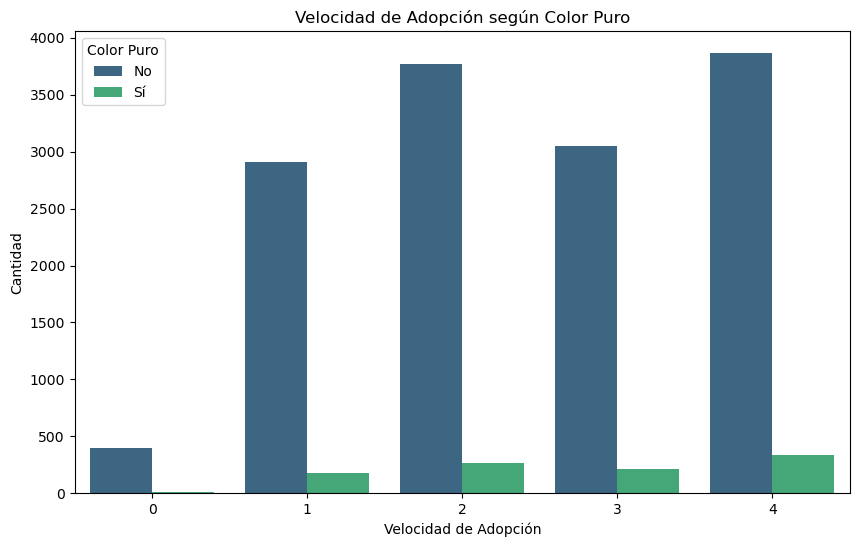

In [7]:
#Ahora graficamos la velocidad de adopción según si el color de la mascota es puro o no:

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Pure_color', palette='viridis')
plt.title('Velocidad de Adopción según Color Puro')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Color Puro', labels=['No', 'Sí'])
plt.show()


Color puro "No" -mezcla- sigue el mismo perfil de velocidades de adopción del dataset completo.

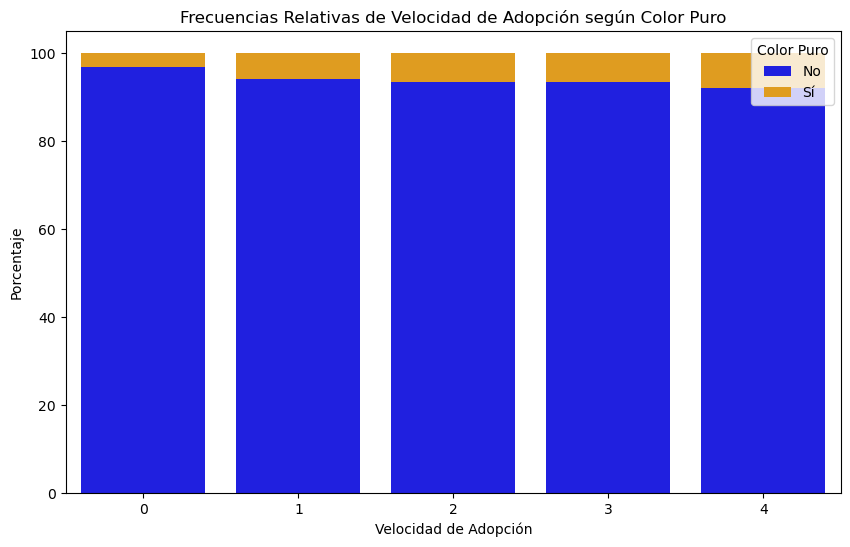

In [8]:
#Graficamos ahora en barras apiladas la velocidad de adopción según si el color de la mascota es puro o no:

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Pure_color'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[False], color='blue', label='No')
sns.barplot(x=freq_table.index, y=freq_table[True], color='orange', bottom=freq_table[False], label='Sí')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Color Puro')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend(title='Color Puro', loc='upper right')
plt.show()


No parece observarse a partir del grafico de barras apiladas una tendencia favorable a la adopción mas veloz por el color puro.
Por el contrario, la tendencia parece mostrar que el color puro es ligermaente mas preponderante en velocidades de adopción alta.

### 5.2 Combinación de variables género y esterilización (MMMMM)

In [23]:
#Abrimos el csv train2.csv del directorio actual en el cual hicimos las modificaciones
train2 = pd.read_csv("C:\\Users\\HOME\\Documents\\Maestría CDV\\11.Labo2\\repo\\LABO2_Group18\\input\\train2.csv")

train2.head()

#Agregar ruta al repositorio de github

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,NaN,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


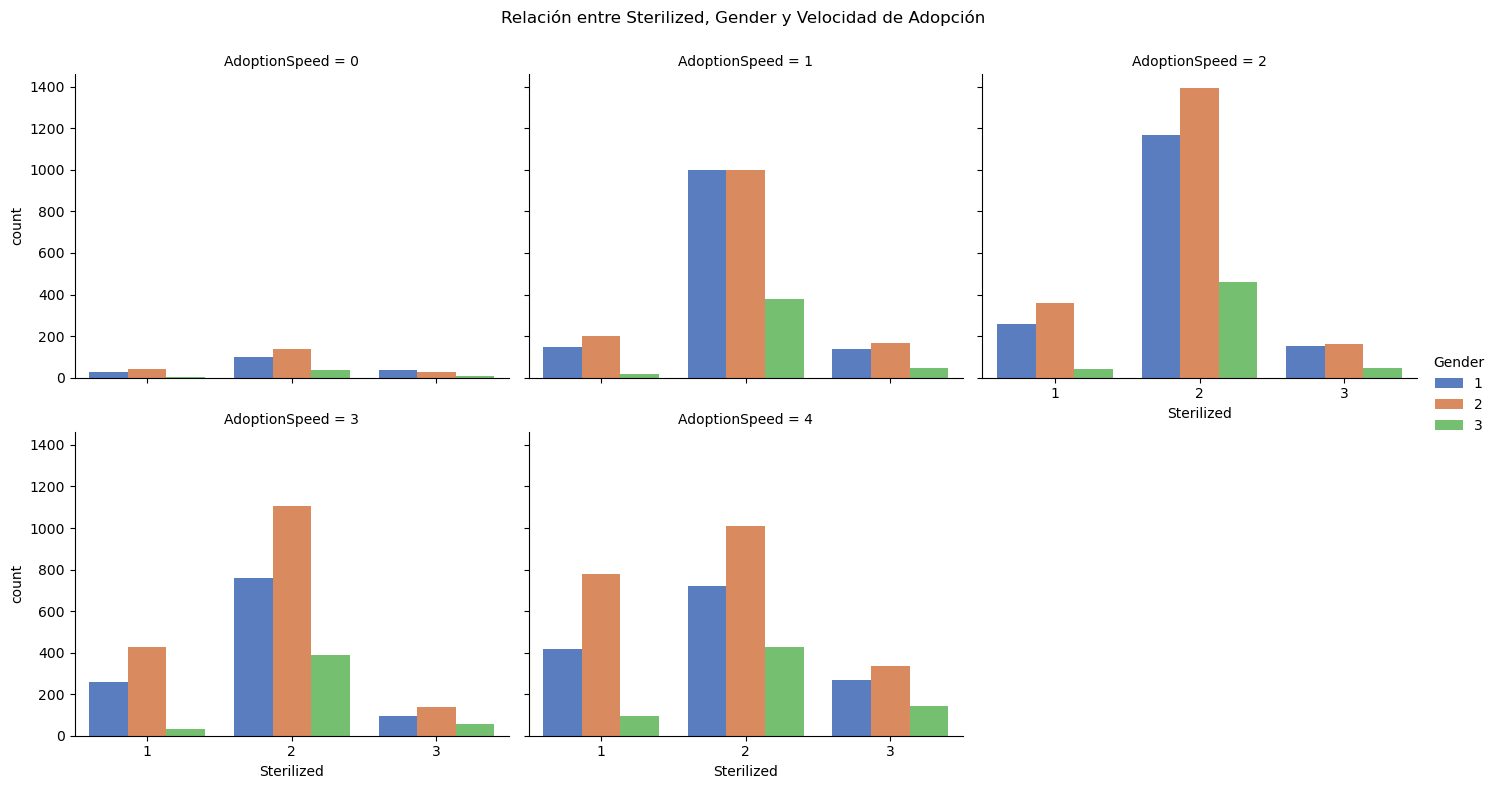

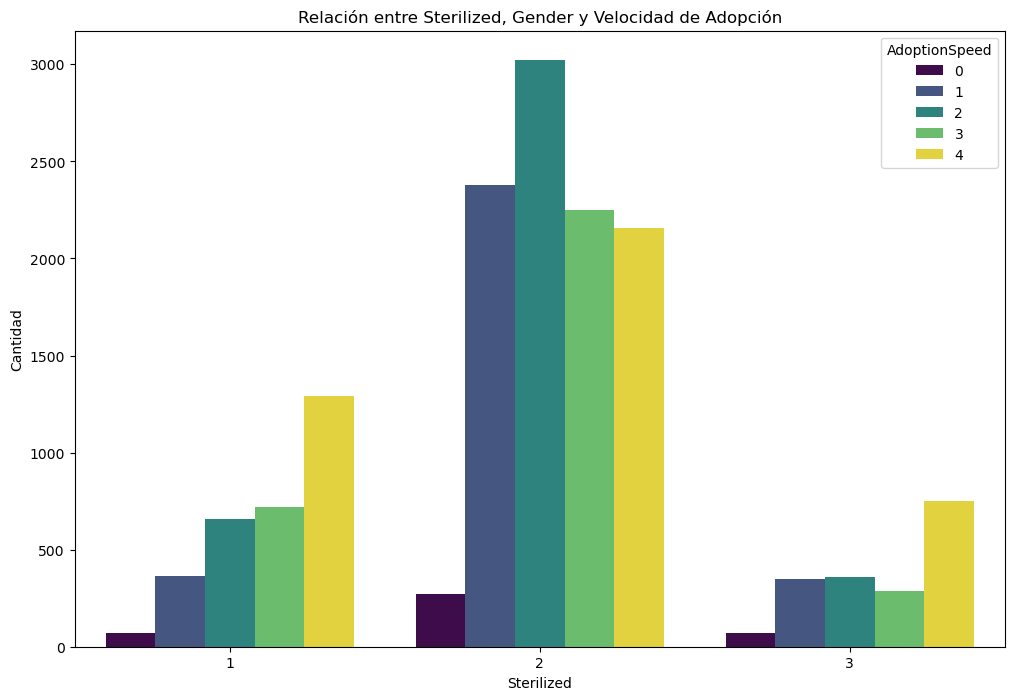

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de barras agrupadas con "AdoptionSpeed" como variable de color
sns.catplot(data=train2, x='Sterilized', hue='Gender', col='AdoptionSpeed', kind='count', palette='muted', col_wrap=3, height=4, aspect=1.2)

# Ajustar títulos y etiquetas
plt.subplots_adjust(top=0.9)
plt.suptitle('Relación entre Sterilized, Gender y Velocidad de Adopción')

# Mostrar el gráfico
plt.show()


# Crear el gráfico de barras agrupadas con "AdoptionSpeed" como variable de color
plt.figure(figsize=(12, 8))
sns.countplot(data=train2, x='Sterilized', hue='AdoptionSpeed', palette='viridis', dodge=True)

# Agregar título y etiquetas
plt.title('Relación entre Sterilized, Gender y Velocidad de Adopción')
plt.xlabel('Sterilized')
plt.ylabel('Cantidad')
plt.legend(title='AdoptionSpeed')

# Mostrar el gráfico
plt.show()

#comentarios de 5.2

### 5.3 Creación de variable de salud integral

In [33]:
#Creamos una variable 'Health_Int' que indica si la mascota tiene un estado de salud integral bueno o no.
#La variable toma el valor 1 si la mascota tiene Health=1, Dewormed=1, Sterilized=1, Vaccinated=1, y 0 en caso contrario.

# Crear una columna 'Health_Int' para indicar si la mascota tiene un estado de salud integral
train['Health_Int'] = (train['Health'] == 1) & (train['Dewormed'] == 1) & (train['Sterilized'] == 1) & (train['Vaccinated'] == 1)

#Toma valor cero si no cumple con las condiciones:
train['Health_Int'] = train['Health_Int'].apply(lambda x: 1 if x else 0)

# Mostrar las primeras 5 filas
train.head()
print(train.head())

#Contamos cuantos registros de cada factor de la variable Health_Int y su porcentaje:
# Calcular la cantidad de observaciones con estado de salud integral
health_int_count = train['Health_Int'].sum()
print("Cantidad de Observaciones con Estado de Salud Integral=1:", health_int_count)

# Calcular el porcentaje de observaciones con estado de salud integral
health_int_percentage = health_int_count / train.shape[0] * 100
print("Porcentaje de Observaciones con Estado de Salud Integral=1:", health_int_percentage)

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f

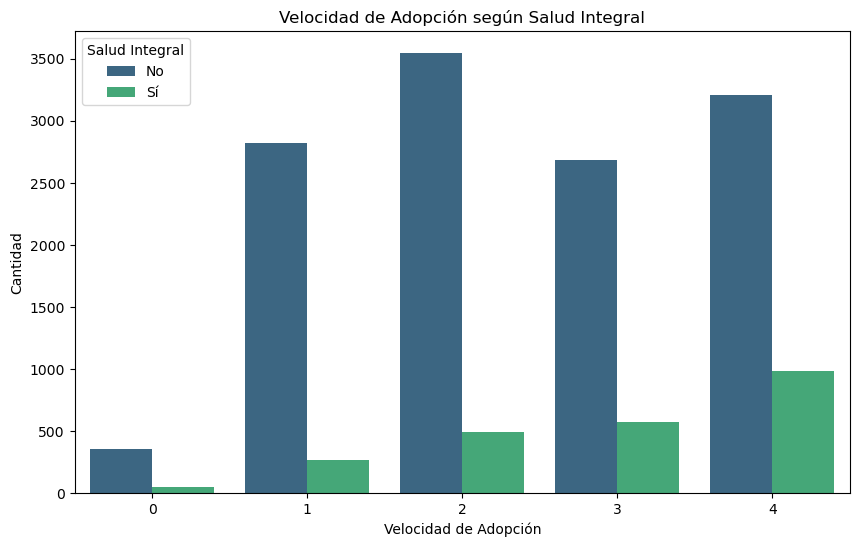

In [34]:
#Ahora graficamos Health_Int vs AdoptionSpeed:

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Health_Int', palette='viridis')
plt.title('Velocidad de Adopción según Salud Integral')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Salud Integral', labels=['No', 'Sí'])
plt.show()


El factor Health_Int=1 (o sí), representa el 15% del dataset y muestra un perfil de cantidades crecientes junto con la velocidad de adopción. Por otro lado, el factor 0 (o no), representa el 85% de los registros y toma el perfil general del dataset train. 
La velocidad de adopción es una variable temporal, con lo que resulta coherente que a mayor demora en la adopción (vel=>4), se hayan cumplido con los procedimientos preventivos de salud como vacunaciones, desparasitación, esterilización, etc.
Sería interesante estudiar este efecto de salud integral sólo aplciado a los cachorrros (que por su corta edad pertenecen al grupo: sin vacunar, sin esterilizar y posiblemente sin desparasitar, o sea Helath_Int=0).

### 5.4 Agregado de variable raza Pura 

In [35]:
# Definir las condiciones
#Se considera puro en el caso de ser perro, si la raza 1 es distitna de 307 (mixed breed) y la raza 2 es igual a 0 o a la raza 1 
#para el caso de los perros se condiera puro si la raza 1 es distinta de 0 y la raza 2 es 0 o igual a la 1 
conditions = [
    ((train['Type'] == 1) & (train['Breed1'] != 0) & (train['Breed1'] != 307) & ((train['Breed2'] == 0) | (train['Breed2'] == train['Breed1']))),
    ((train['Type'] == 2) & (train['Breed1'] != 0) & ((train['Breed2'] == 0) | (train['Breed2'] == train['Breed1'])))
]

# Asignar 1 si se cumple alguna de las condiciones, de lo contrario asignar 0
train['Es_Puro'] = 0
train.loc[conditions[0] | conditions[1], 'Es_Puro'] = 1

# Mostrar las primeras filas del DataFrame para verificar
print(train.head(15))

    Type                     Name  Age  Breed1  Breed2  Gender  Color1  \
0      2                   Nibble    3     299       0       1       1   
1      2              No Name Yet    1     265       0       1       1   
2      1                   Brisco    1     307       0       1       2   
3      1                     Miko    4     307       0       2       1   
4      1                   Hunter    1     307       0       1       1   
5      2                      NaN    3     266       0       2       5   
6      2                    BULAT   12     264     264       1       1   
7      1  Siu Pak & Her 6 Puppies    0     307       0       2       1   
8      2                      NaN    2     265       0       2       6   
9      2                    Kitty   12     265       0       2       1   
10     1                     Bear    2     307       0       1       1   
11     2                     Kali    3     264       0       2       1   
12     1                   Peanut    2

### 5.5 Creación de variable Edad por rangos

In [36]:
#Abrimos el csv train2.csv del directorio actual en el cual hicimos las modificaciones
train2 = pd.read_csv("C:\\Users\\HOME\\Documents\\Maestría CDV\\11.Labo2\\repo\\LABO2_Group18\\input\\train2.csv")

train2.head()

#Agregar ruta al repositorio de github

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,NaN,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


(410, 24)


C:\Users\HOME\AppData\Local\Temp\ipykernel_3304\171429139.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adopted_in_0, y='Age', palette='Set2')


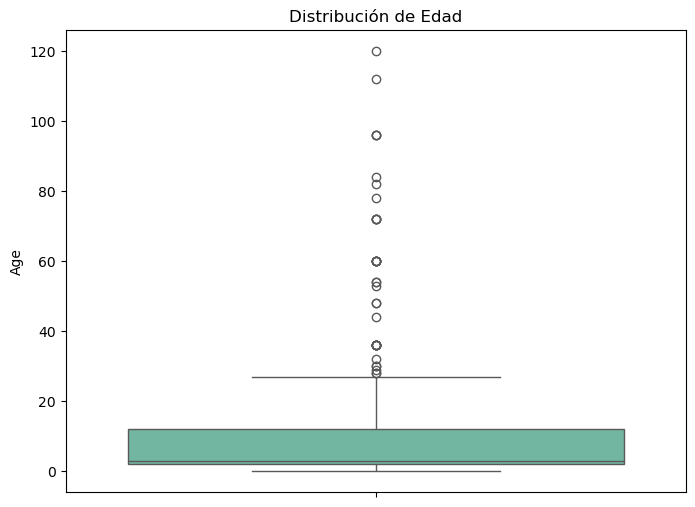

Cuartil 25%: 2.0
Cuartil 50%: 3.0
Cuartil 75%: 12.0


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_group
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2,0
1,2,NaN,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3,0
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2,0
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2,0


In [37]:
#Segmentamos la variable edad de acuerdo a: cachorro (0), adulto (1), senior(2)

import matplotlib.pyplot as plt
import seaborn as sns

#seleccionamos la variable Age para velociadad 0
# Filtrar los datos para obtener solo las mascotas adoptadas en el tiempo 0
adopted_in_0 = train2[train2['AdoptionSpeed'] == 0]
#contamos los registros en adopted_in_0
print(adopted_in_0.shape)

# Crear el boxplot de Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=adopted_in_0, y='Age', palette='Set2')

# Agregar título y etiquetas
plt.title('Distribución de Edad')
plt.ylabel('Age')

# Mostrar el gráfico
plt.show()

# Calcular los cuartiles usando numpy
quartiles = np.percentile(adopted_in_0['Age'], [25, 50, 75])

# Imprimir los resultados
print("Cuartil 25%:", quartiles[0])
print("Cuartil 50%:", quartiles[1])
print("Cuartil 75%:", quartiles[2])

# Crear una columna 'Age_group' para agrupar las edades en rangos
train2['Age_group'] = pd.cut(train2['Age'], bins=[0, 12, 84, 360], labels=[0, 1, 2]) # los puppies tiene hasta 12 meses, los adultos hasta 84 meses y los senior 85+ meses

# Mostrar las primeras 5 filas
train2.head()





#vemos todas las variables
#train2.columns

### 5.6 FE a partir de descripción - analizando la longitud en palabras y caracteres 

In [ ]:
#Agregar Librería para detectar idioma
from langdetect import detect
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords



# Función para limpiar y preprocesar el texto
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'\W+', ' ', text)  # Eliminar caracteres especiales
    text = text.lower()  # Convertir a minúsculas
    text = ' '.join([word for word in text.split() if word not in stopwords])  # Eliminar stopwords
    return text

# Aplicar la función de limpieza
train['cleaned_description'] = train['Description'].fillna('').apply(clean_text)

# Extraer longitud de la descripción
train['desc_length_char'] = train['cleaned_description'].apply(len)
train['desc_length_word'] = train['cleaned_description'].apply(lambda x: len(x.split()))

# Detectar idioma de la descripción
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

train['desc_language'] = train['Description'].fillna('').apply(detect_language)

# Visualizar la distribución de las nuevas características
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Longitud de la descripción (caracteres)
sns.histplot(train['desc_length_char'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Longitud de Descripción (Caracteres)')
axs[0, 0].set_xlabel('Longitud (Caracteres)')

# Longitud de la descripción (palabras)
sns.histplot(train['desc_length_word'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Longitud de Descripción (Palabras)')
axs[0, 1].set_xlabel('Longitud (Palabras)')

# Distribución del idioma de la descripción
sns.countplot(y='desc_language', data=train, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Distribución de Idiomas de Descripción')
axs[1, 0].set_xlabel('Cuenta')

# Relación entre longitud de la descripción y velocidad de adopción
sns.boxplot(x='AdoptionSpeed', y='desc_length_word', data=train, ax=axs[1, 1])
axs[1, 1].set_title('Relación entre Longitud de Descripción (Palabras) y Velocidad de Adopción')
axs[1, 1].set_xlabel('Velocidad de Adopción')
axs[1, 1].set_ylabel('Longitud de Descripción (Palabras)')

plt.tight_layout()
plt.show()

# Mostrar algunas filas del dataframe con las nuevas columnas
print(train[['PetID', 'AdoptionSpeed', 'desc_length_char', 'desc_length_word', 'desc_language']].head())


Analisis de Sentimientos a partir de la descripción

In [ ]:
import os
import json
import pandas as pd
import numpy as np

def extract_sentiment_features(json_data):
    """
    Extract average sentiment score and magnitude from JSON data.
    """
    scores = [sentence['sentiment']['score'] for sentence in json_data['sentences']]
    magnitudes = [sentence['sentiment']['magnitude'] for sentence in json_data['sentences']]
    return np.mean(scores), np.mean(magnitudes)

def analyze_sentiments(train, path_to_sentiment_files_train):
    """
    Insert sentiment features into the dataframe.
    """
    scores = []
    for file in os.listdir(path_to_sentiment_files_train):
        if file.endswith('.json'):
            file_path = os.path.join(path_to_sentiment_files_train, file)
            with open(file_path, 'r') as f:
                try:
                    sentiment = json.load(f)
                    pet_id = file.split('.')[0]
                    avg_score, avg_magnitude = extract_sentiment_features(sentiment)
                    scores.append({
                        "PetID": pet_id,
                        "sentiment_score": avg_score,
                        "sentiment_magnitude": avg_magnitude
                    })
                except Exception as e:
                    print(f"Error processing {file}: {e}")
    
    sentiment_train = pd.DataFrame(scores)
    
    # Merge sentiment features
    train = pd.merge(train, sentiment_train, on='PetID', how='left')
    return train


# Specify the path to your sentiment files
path_to_sentiment_files_train = '../../input/petfinder-adoption-prediction/train_sentiment'

# Analyze sentiments and update the DataFrame
train = analyze_sentiments(train, path_to_sentiment_files_train)

# View the head of the DataFrame
print(train.head())



## 6. Separa la base de Test y Train


### 7. Para la parte de Train, armar un esquema de Cross Validation


## 8. Desarrollar modelo datos estructurados

## 9. Desarrollar modelo(s) datos no estructurados (Opcional)

## 10. Desarrollar modelo ensamblado (Opcional)

## 11. Valoración del modelo/conclusiones